In [1]:
import os
import matplotlib.pyplot as plt
import utils as ul
from scipy.spatial.transform import Rotation
import numpy as np

In [2]:
bagfilename = "trial_2_0628"
csvNameList = [("mavros-imu-data.csv", True, "imu"),
               ("mavros-local_position-pose.csv", True, "local_position"),
               ("mavros-local_position-velocity_local.csv", True, "local_velocity"),
               ("state_estimator-local_position-odom-UAV0.csv", True, "state_estimator"),
               ("mocap-UAV0.csv", True, "mocap"),
               ("tracking_controller-output_data.csv", True, "output"),
               ("tracking_controller-target.csv", True, "target")]
dir = os.getcwd() + "/data/" + bagfilename + "/"
startT = 1
endT = 110

In [3]:
# print(Tbase)
loggings = dict()
for filename in csvNameList:
    loggings[filename[2]] = ul.ProcessRosbagDataFromCSVWithBaseTime(dir + filename[0], startT, endT, calcTime=filename[1])

In [4]:
roll, pitch, yaw = ul.QuaT2EulerAngles(loggings["imu"])

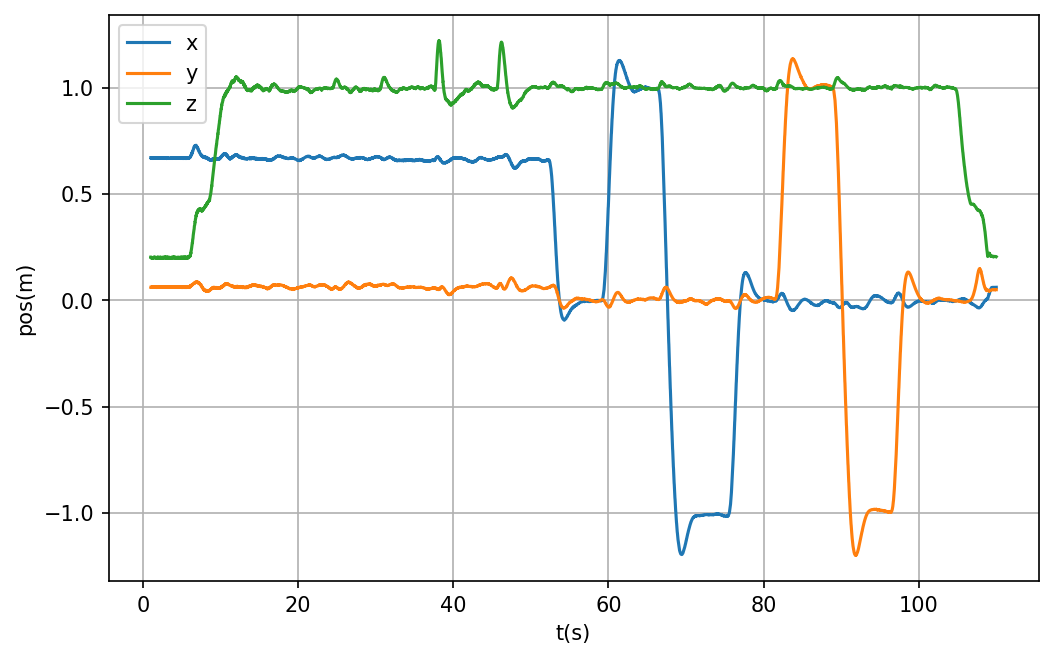

In [5]:
plt.figure(figsize=(8,5), dpi= 150)
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['pose.position.x'])
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['pose.position.y'])
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['pose.position.z'])
plt.legend(['x', 'y', 'z']) 
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

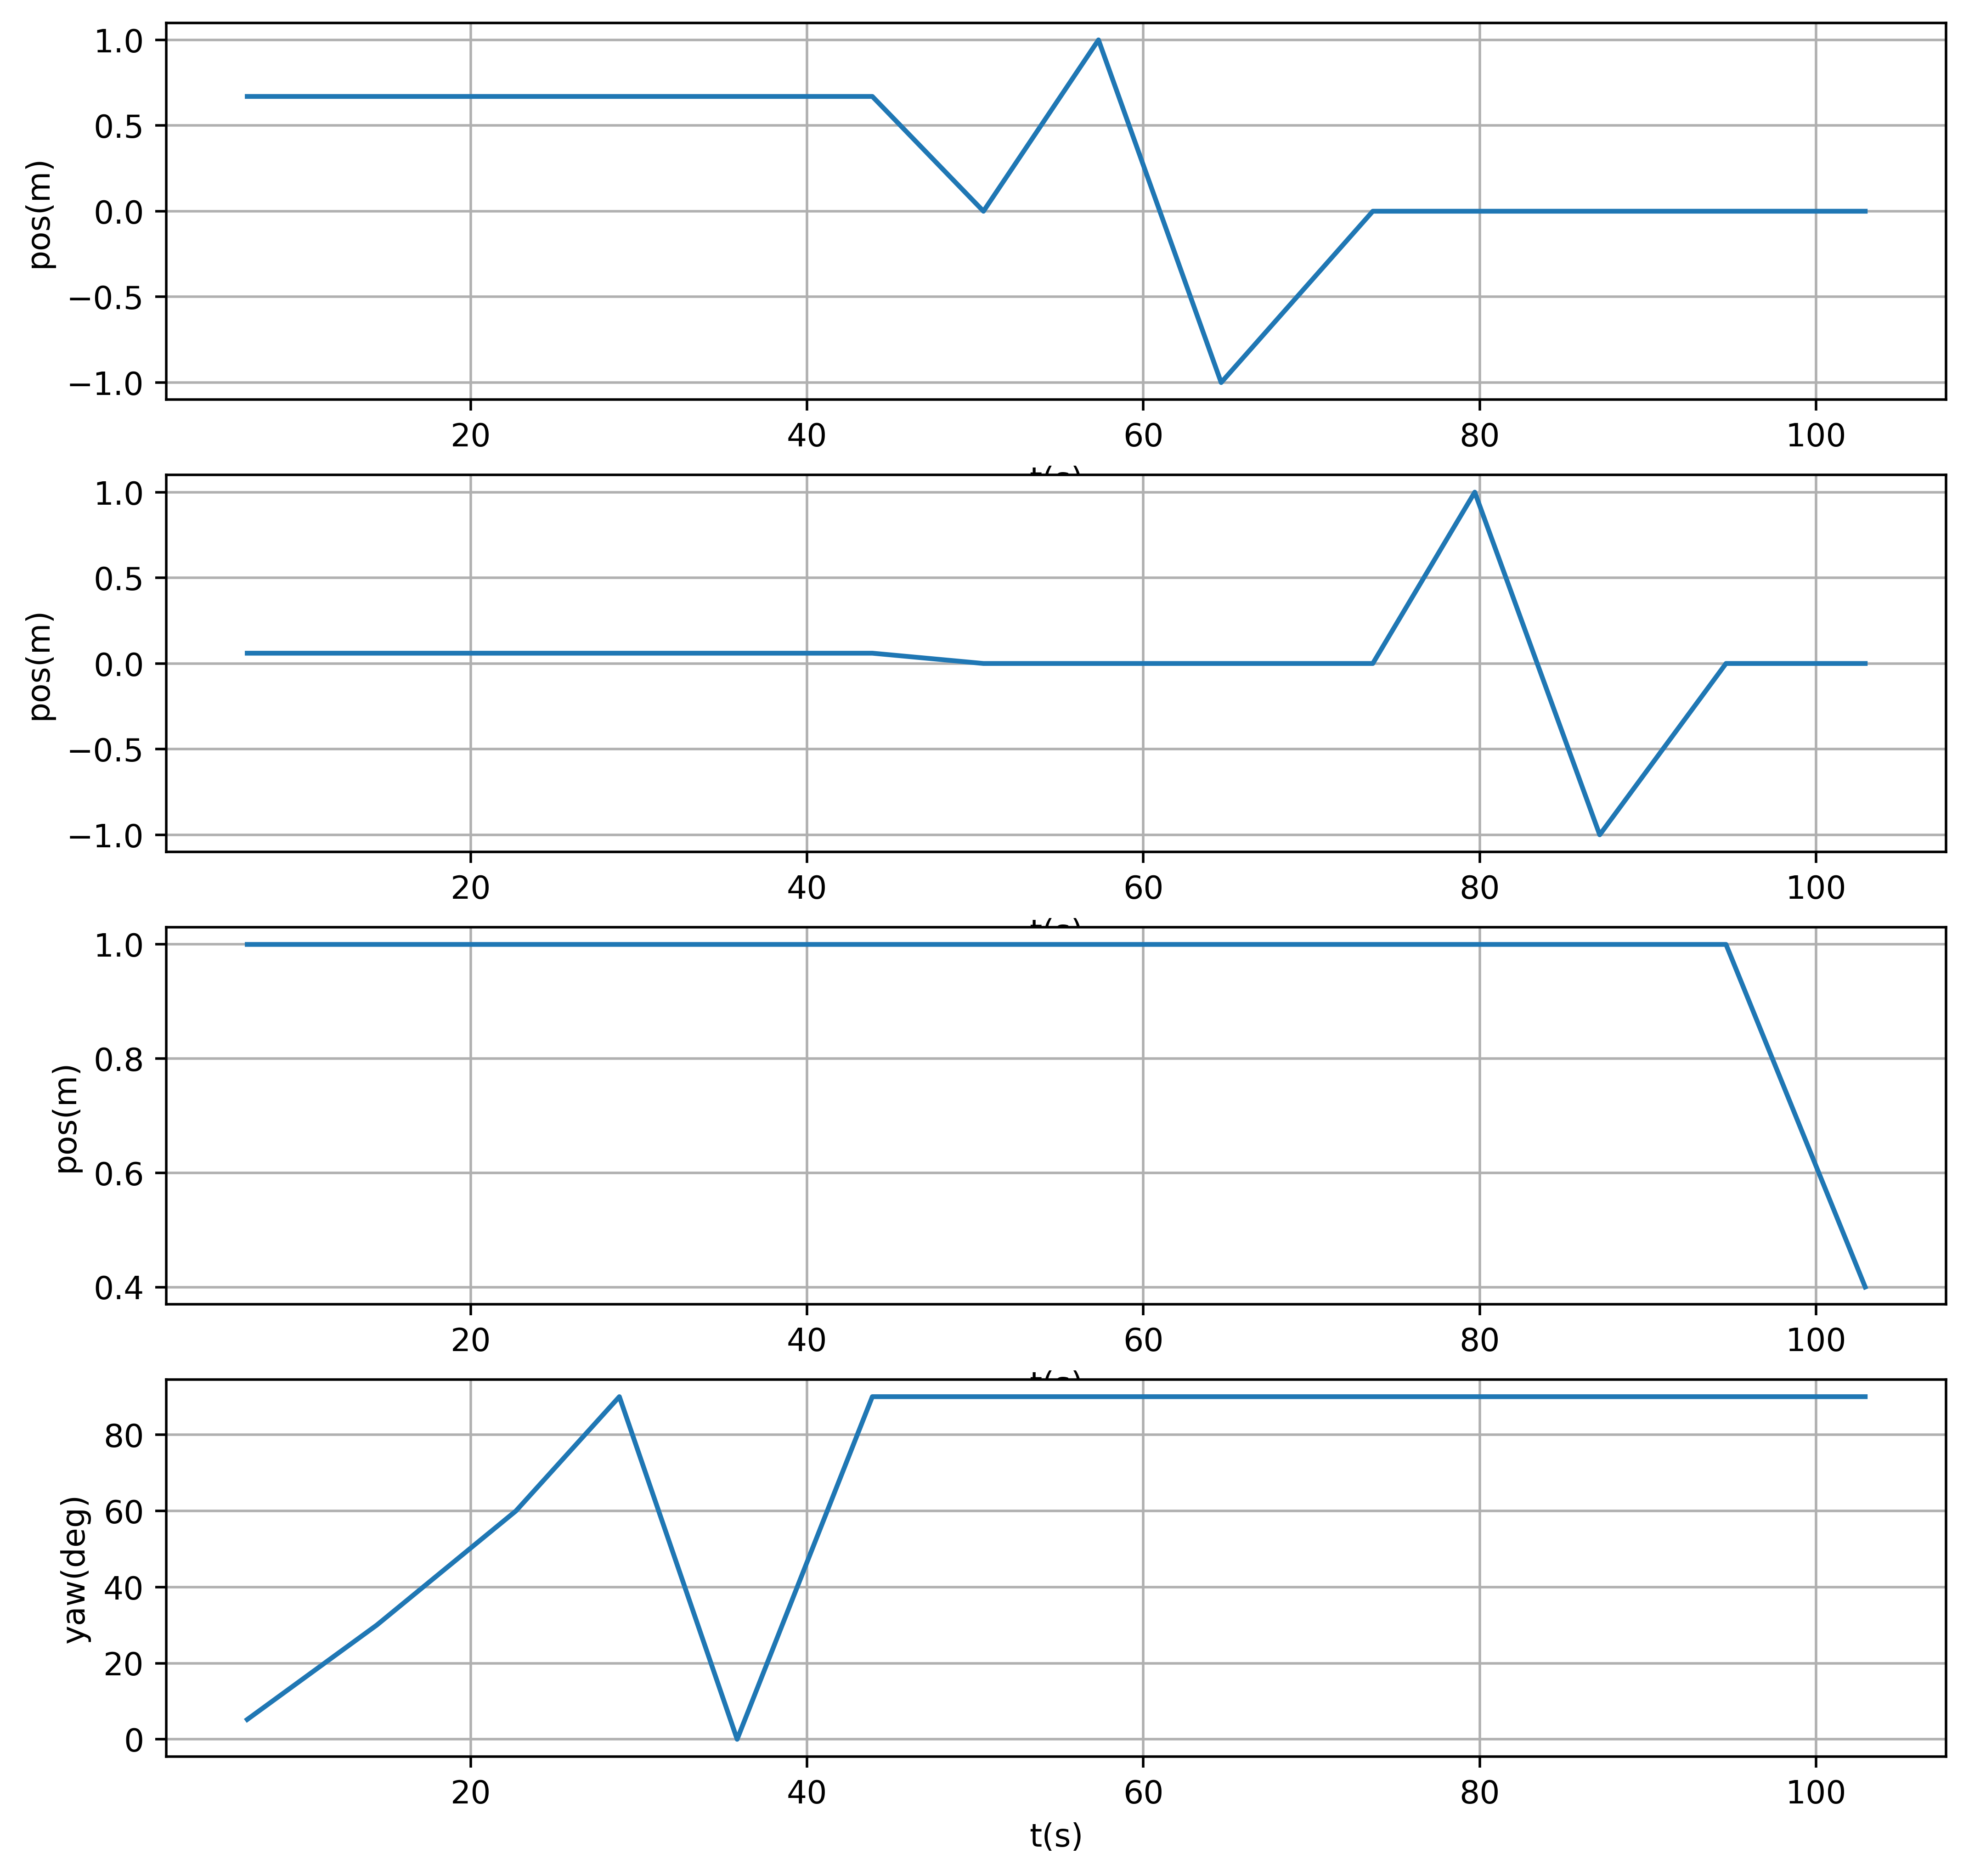

In [6]:
plt.figure(figsize=(10,10), dpi= 500)
plt.subplot(411)
plt.plot(loggings["target"]["processed_time"], loggings["target"]['pose.position.x'])
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(412)
plt.plot(loggings["target"]["processed_time"], loggings["target"]['pose.position.y'])
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(413)
plt.plot(loggings["target"]["processed_time"], loggings["target"]['pose.position.z'])
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(414)
plt.plot(loggings["target"]["processed_time"], loggings["target"]['yaw'])
plt.ylabel('yaw(deg)')
plt.xlabel('t(s)')
plt.grid(True)

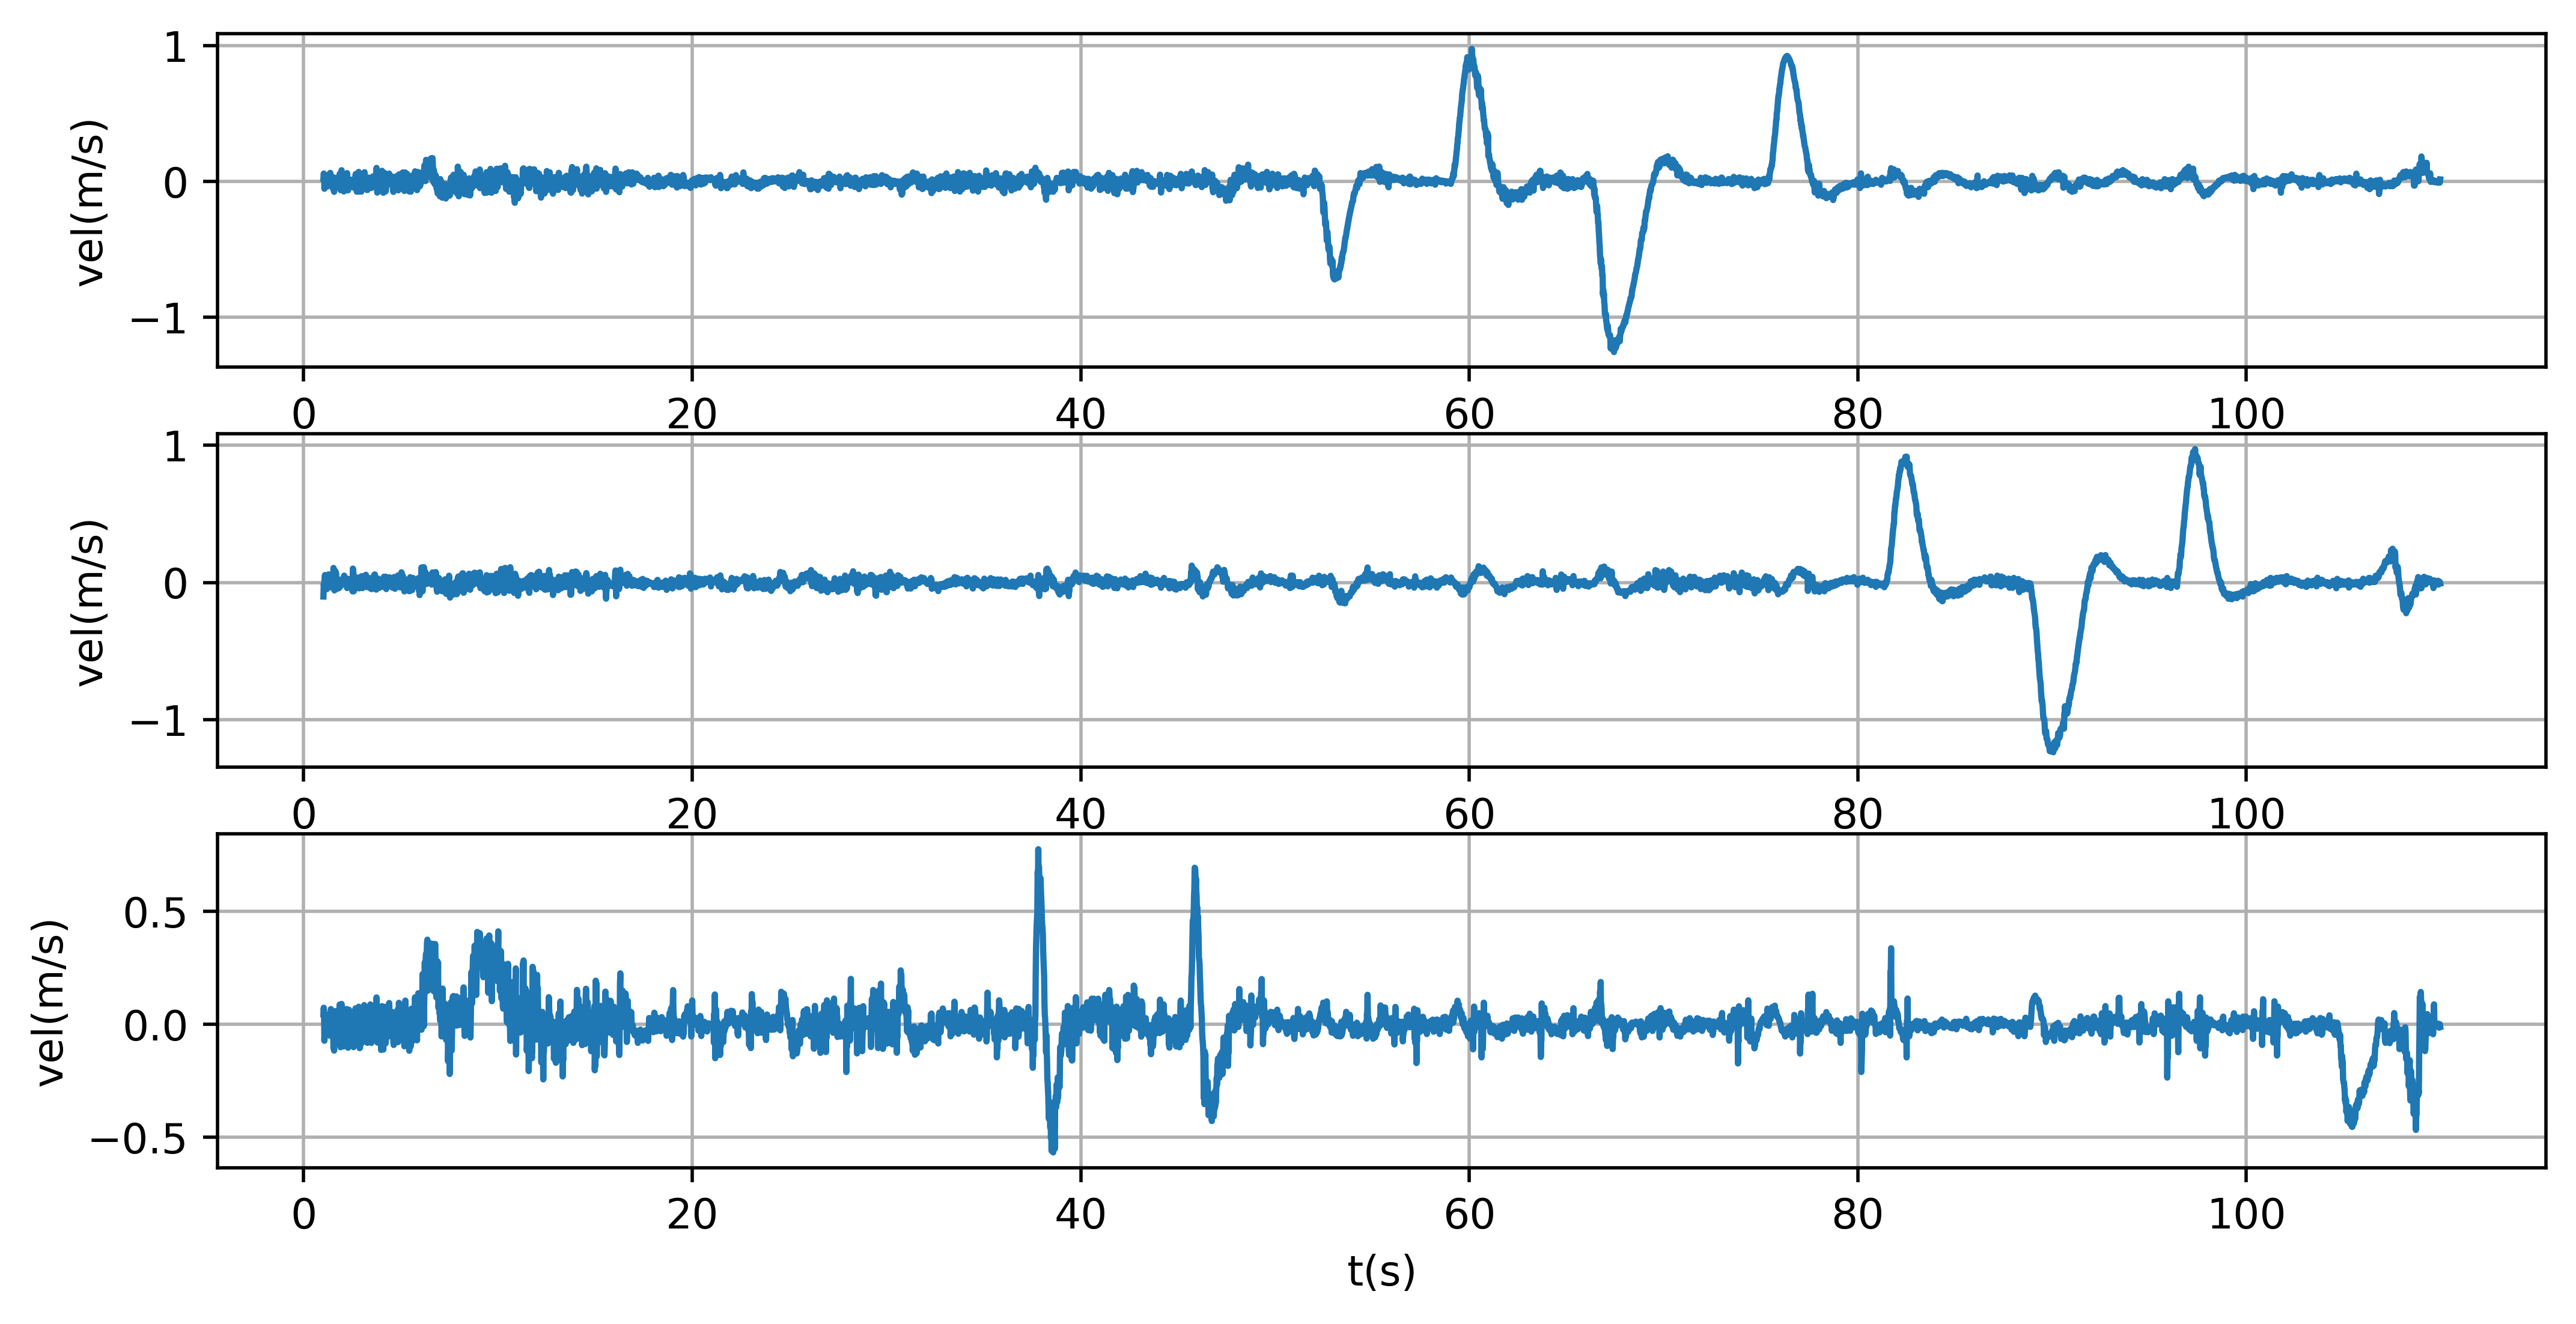

In [7]:
plt.figure(figsize=(10,5), dpi= 500)
plt.subplot(311)
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['twist.linear.x'])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(312)
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['twist.linear.y'])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(313)
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['twist.linear.z'])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)


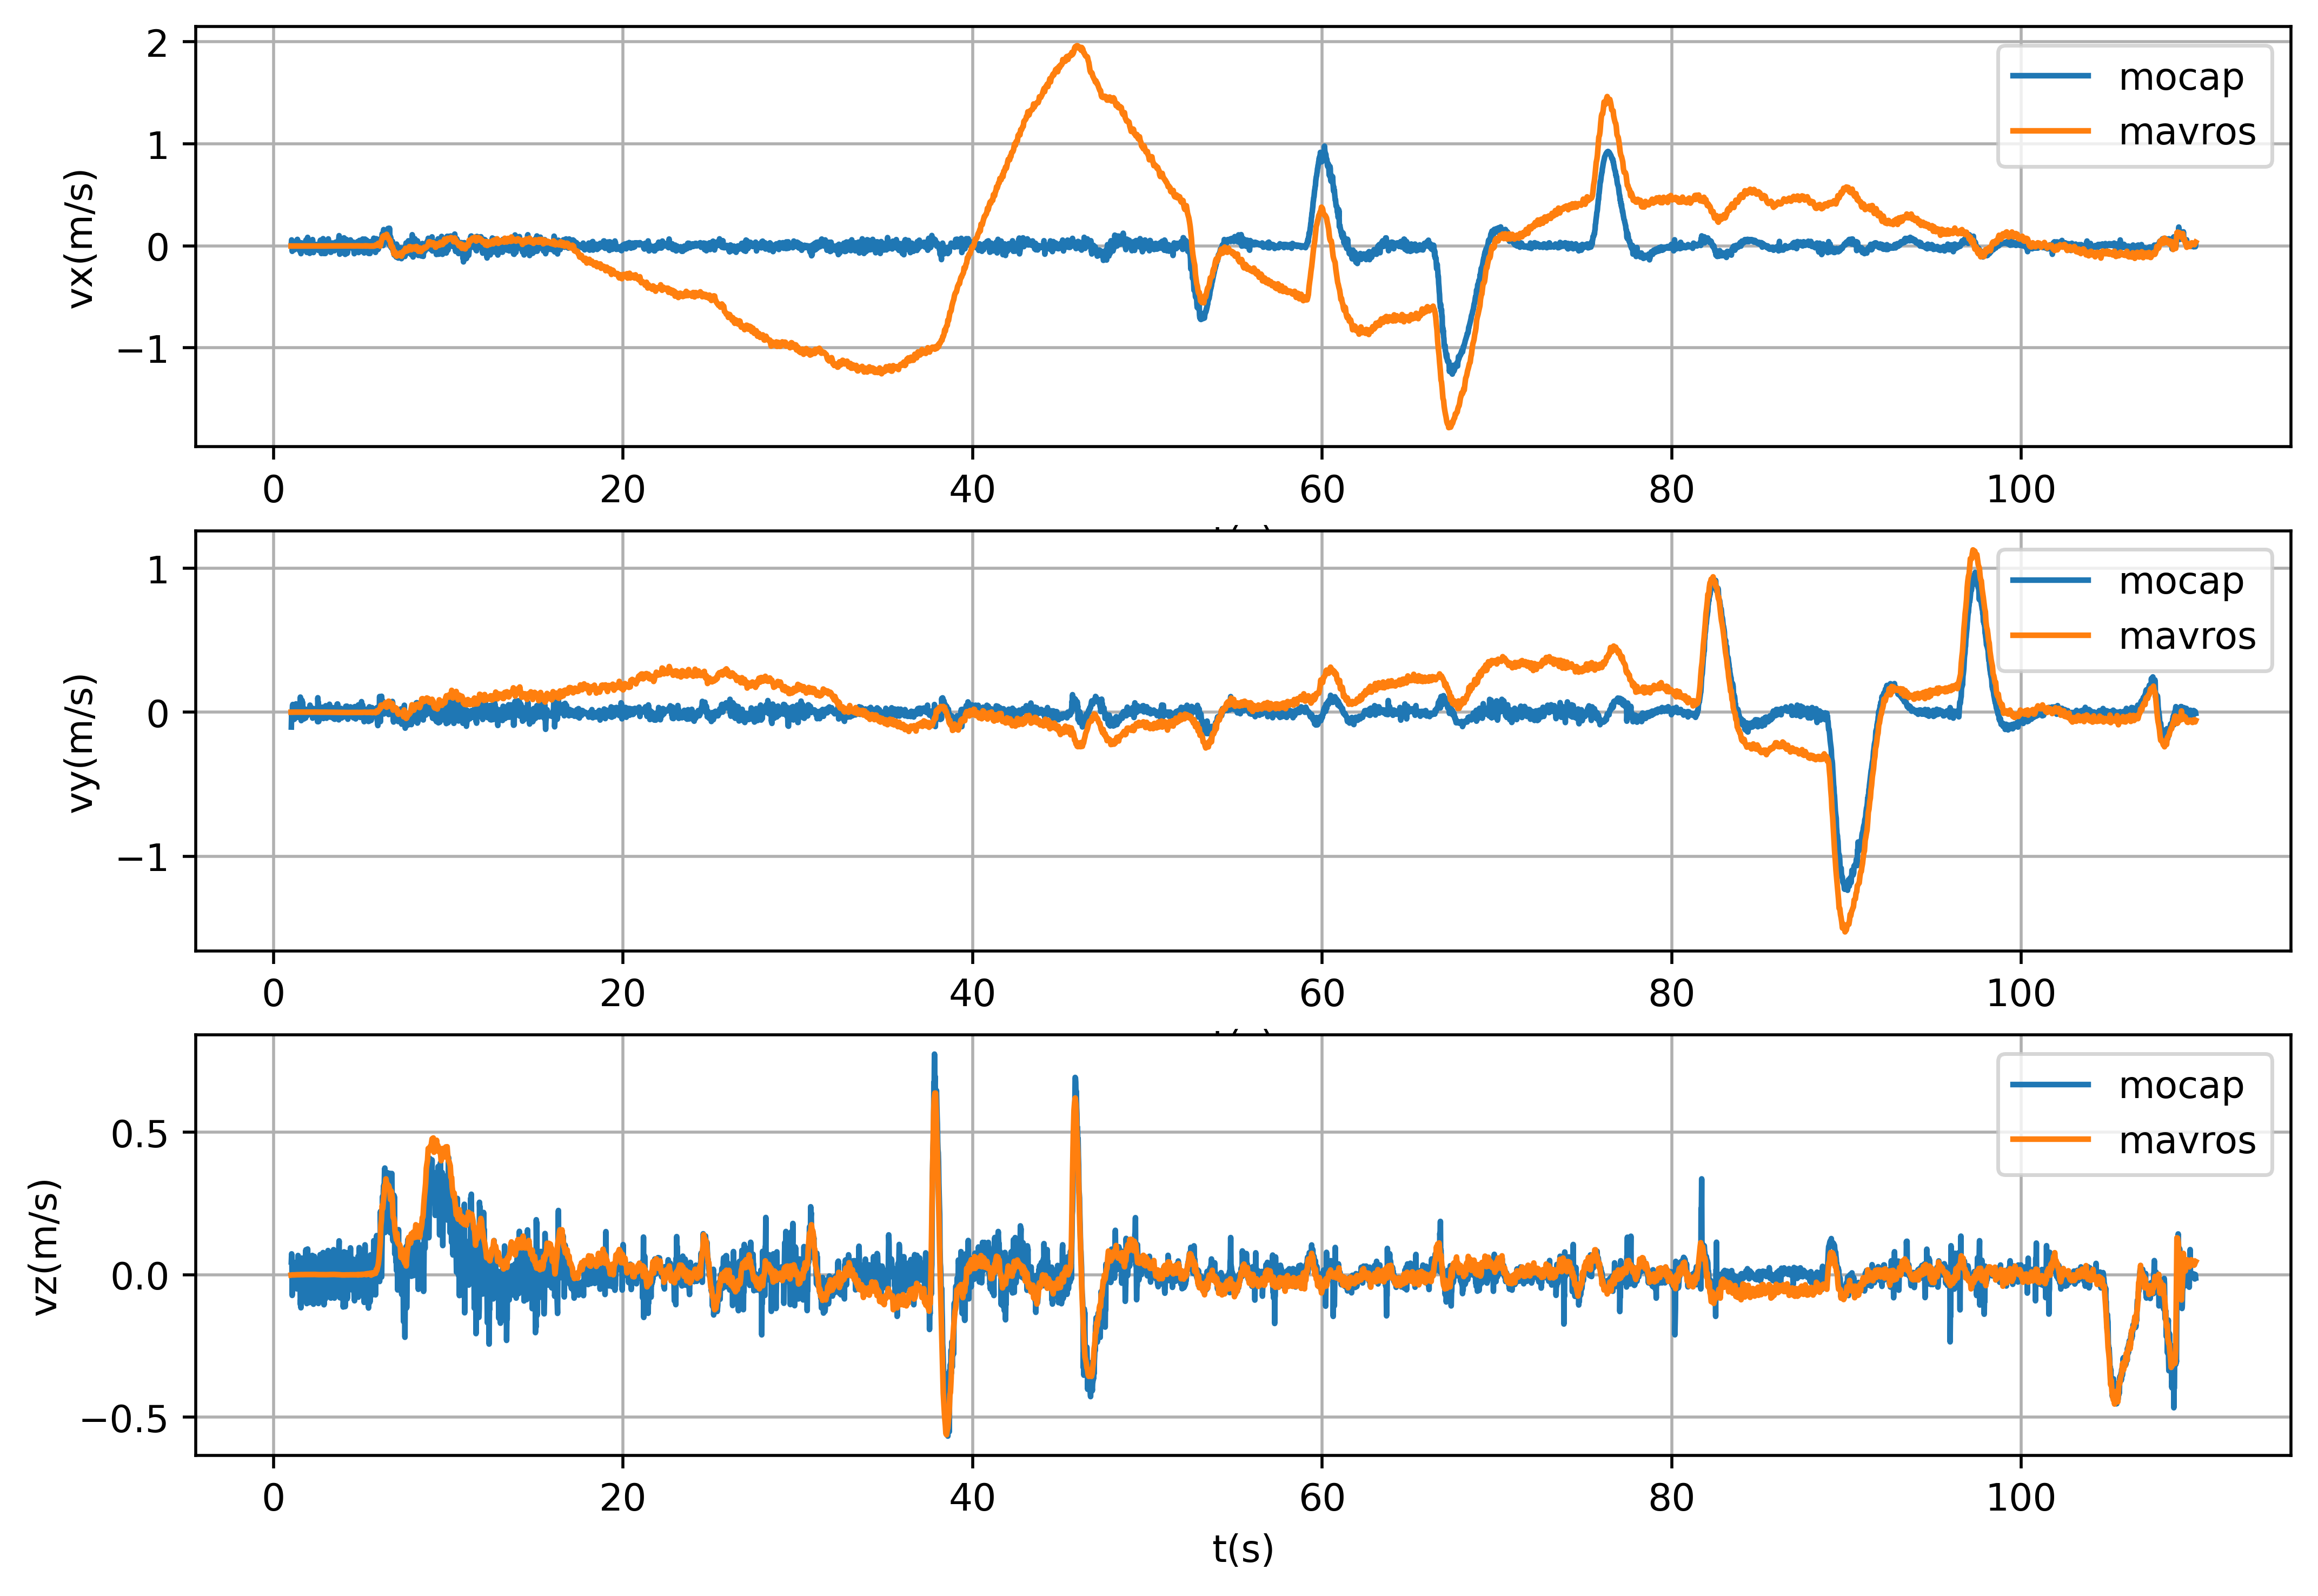

In [8]:
plt.figure(figsize=(10,7), dpi= 500)

plt.subplot(311)
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['twist.linear.x'])
plt.plot(loggings["local_velocity"]["processed_time"], loggings["local_velocity"]['twist.linear.x'])
plt.legend(['mocap','mavros']) 
plt.ylabel('vx(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(312)
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['twist.linear.y'])
plt.plot(loggings["local_velocity"]["processed_time"], loggings["local_velocity"]['twist.linear.y'])
plt.legend(['mocap','mavros']) 
plt.ylabel('vy(m/s)')
plt.xlabel('t(s)')
plt.grid(True)


plt.subplot(313)
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['twist.linear.z'])
plt.plot(loggings["local_velocity"]["processed_time"], loggings["local_velocity"]['twist.linear.z'])
plt.legend(['mocap','mavros']) 
plt.ylabel('vz(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

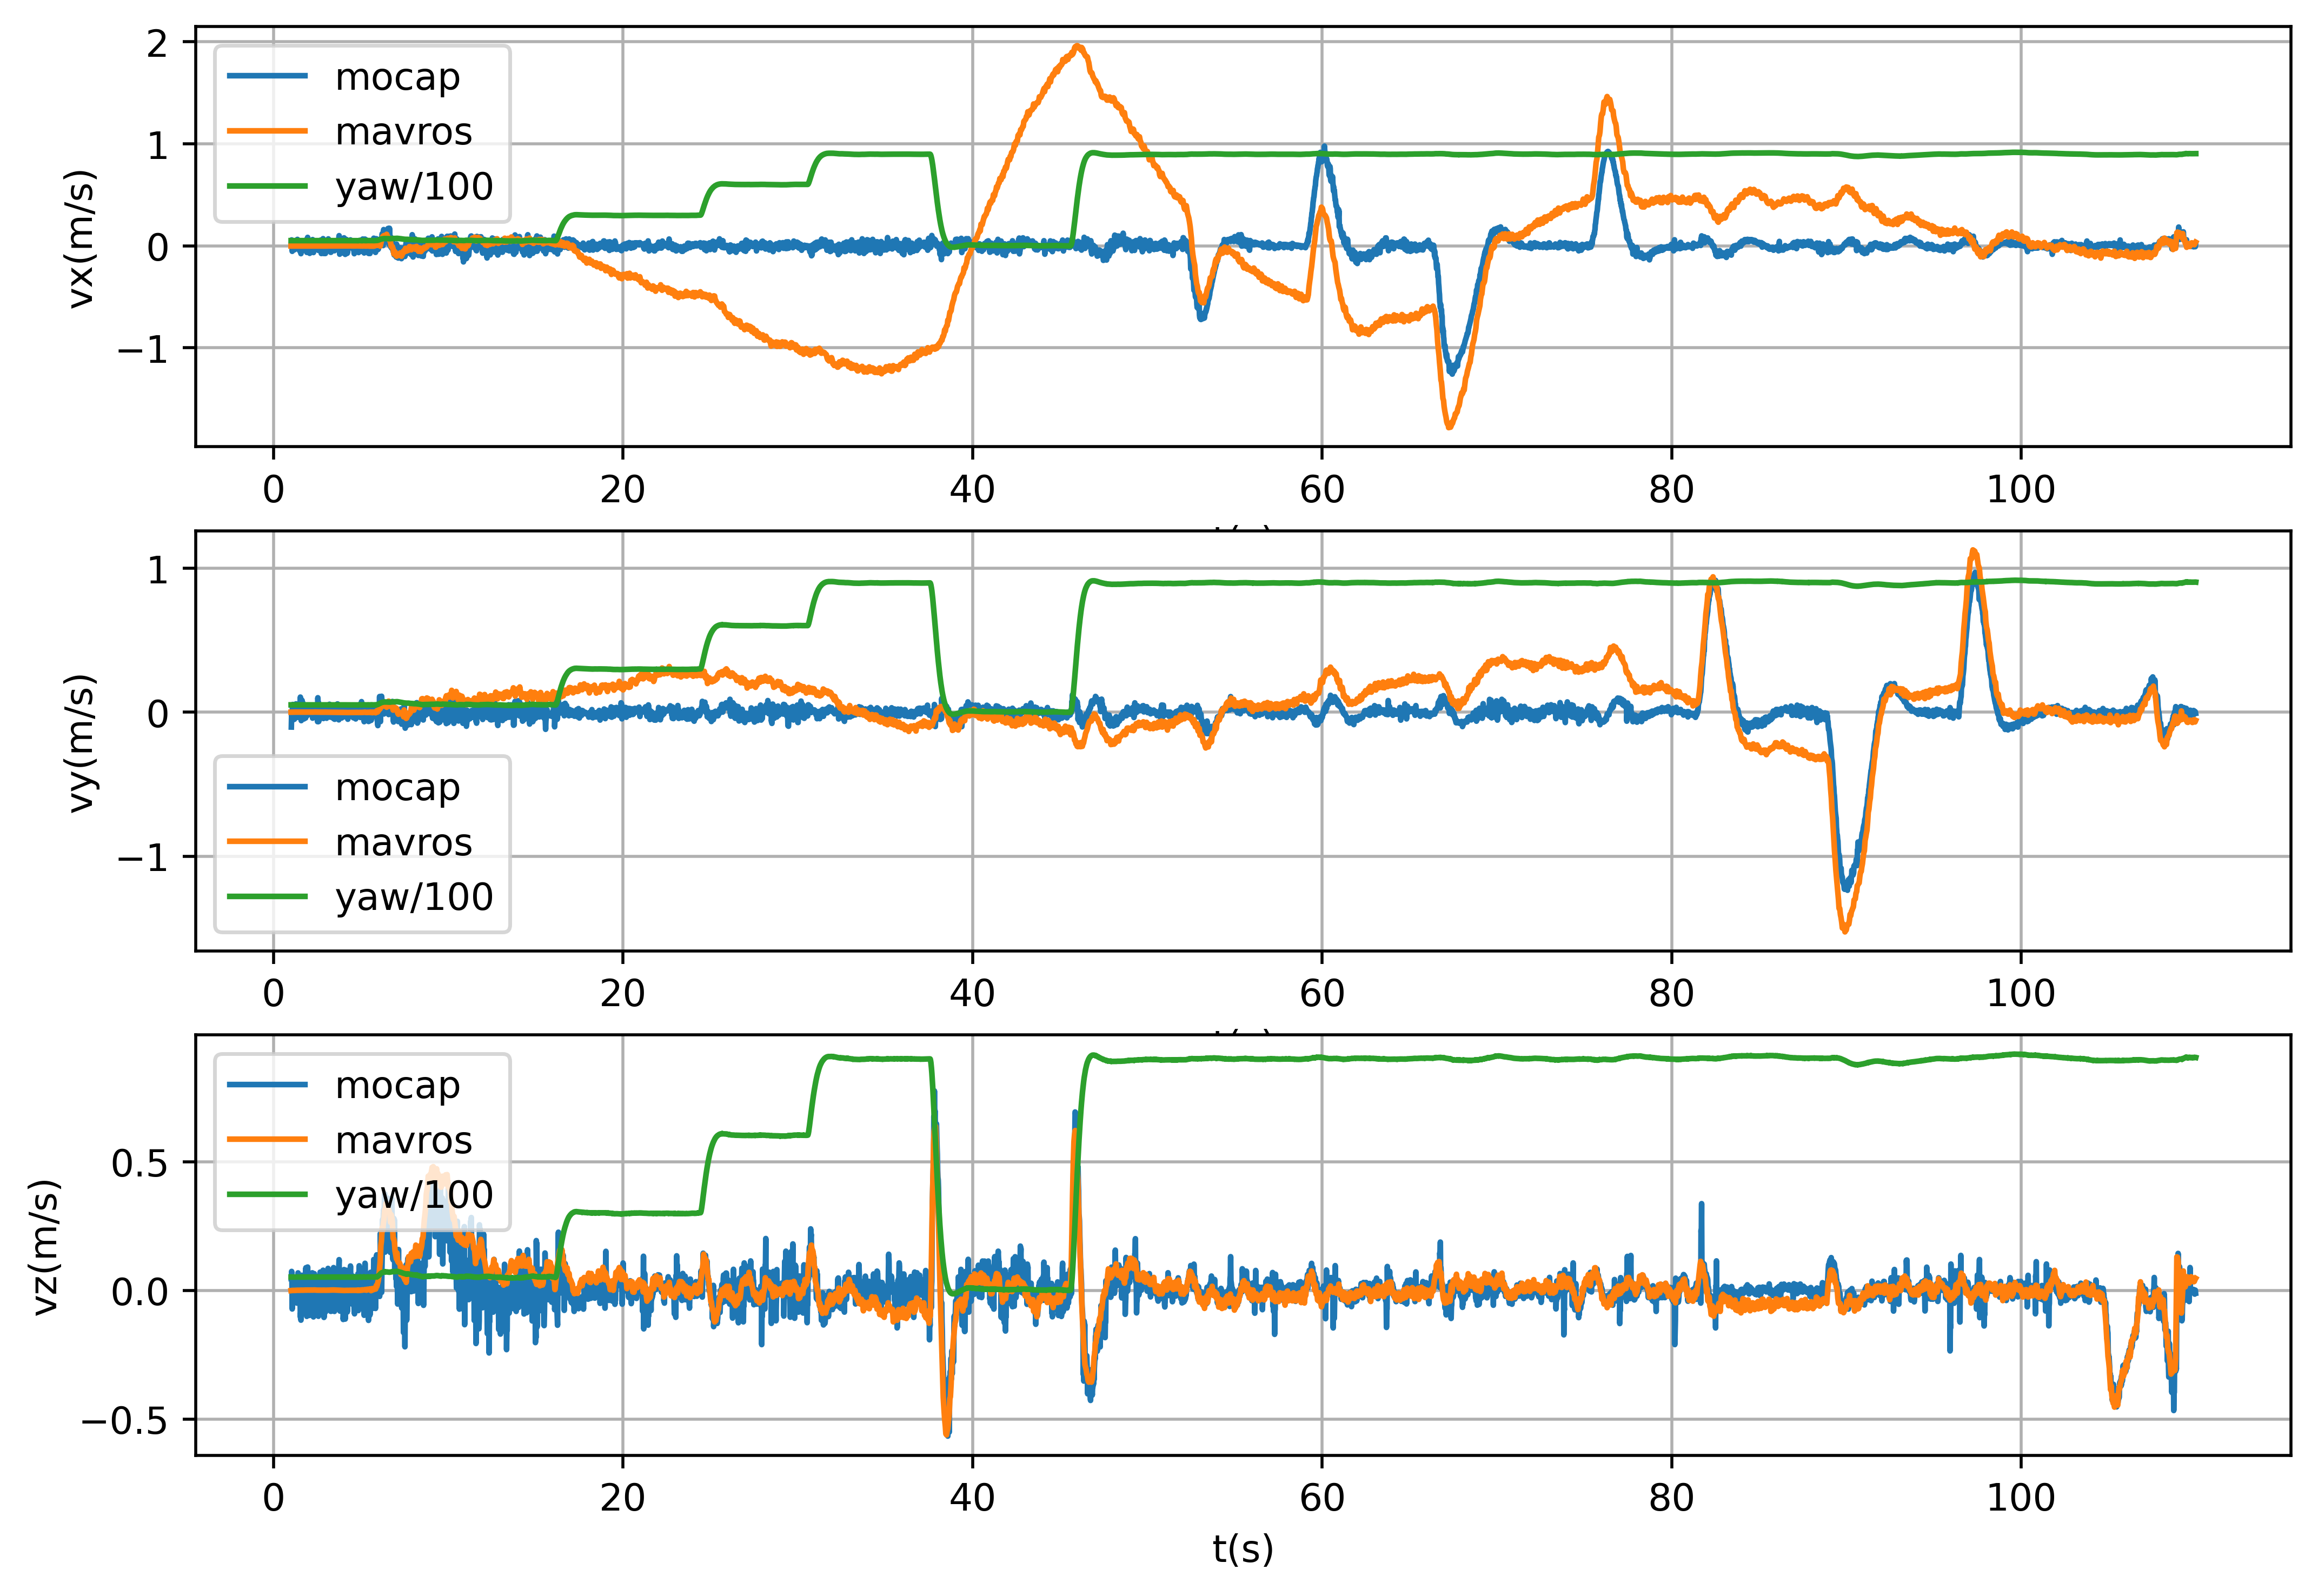

In [9]:
plt.figure(figsize=(10,7), dpi= 500)
plt.subplot(311)
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['twist.linear.x'])
plt.plot(loggings["local_velocity"]["processed_time"], loggings["local_velocity"]['twist.linear.x'])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)

plt.legend(['mocap','mavros', 'yaw/100']) 
plt.ylabel('vx(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(312)
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['twist.linear.y'])
plt.plot(loggings["local_velocity"]["processed_time"], loggings["local_velocity"]['twist.linear.y'])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)

plt.legend(['mocap','mavros', 'yaw/100']) 
plt.ylabel('vy(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(313)
plt.plot(loggings["mocap"]["processed_time"], loggings["mocap"]['twist.linear.z'])
plt.plot(loggings["local_velocity"]["processed_time"], loggings["local_velocity"]['twist.linear.z'])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)
plt.legend(['mocap','mavros', 'yaw/100']) 
plt.ylabel('vz(m/s)')
plt.xlabel('t(s)')
plt.grid(True)


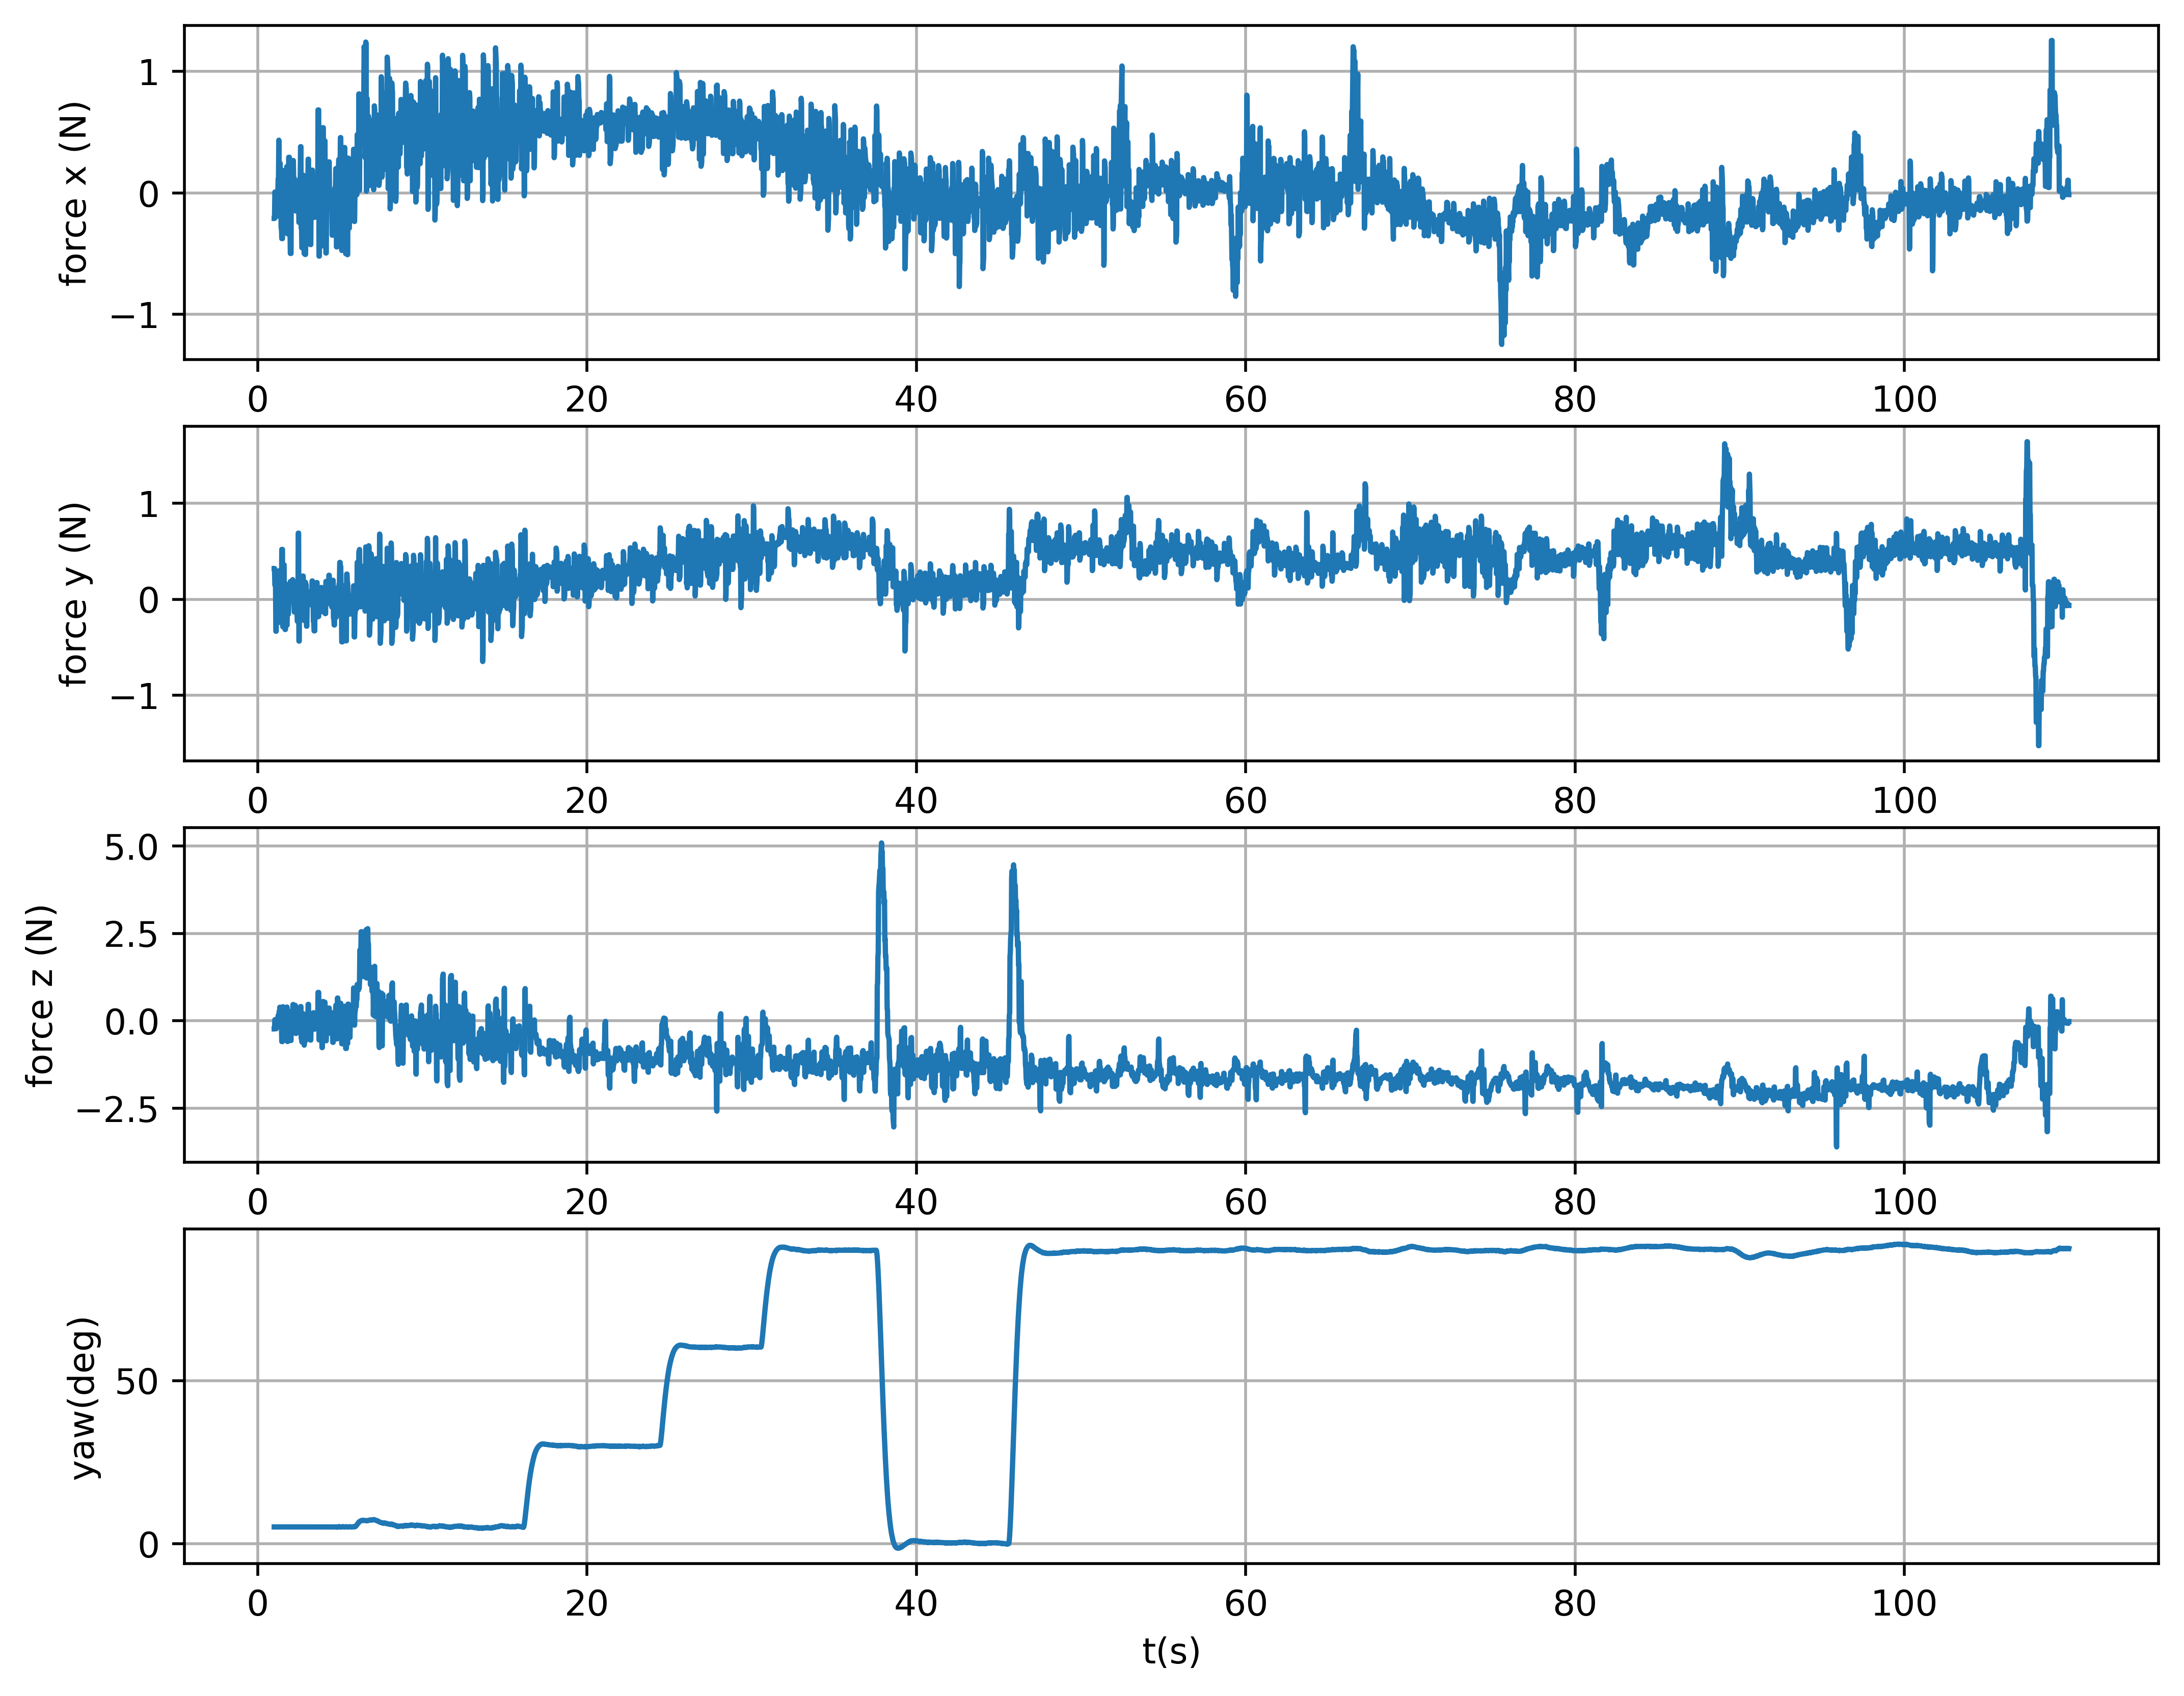

In [10]:
plt.figure(figsize=(10,8), dpi= 500)
plt.subplot(411)
plt.plot(loggings["output"]["processed_time"], loggings["output"]['ude_state.disturbance_estimate.x'])
plt.ylabel('force x (N)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(412)
plt.plot(loggings["output"]["processed_time"], loggings["output"]['ude_state.disturbance_estimate.y'])
plt.ylabel('force y (N)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(413)
plt.plot(loggings["output"]["processed_time"], loggings["output"]['ude_state.disturbance_estimate.z'])
plt.ylabel('force z (N)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(414)
plt.plot(loggings["imu"]["processed_time"], yaw)
plt.ylabel('yaw(deg)')
plt.xlabel('t(s)')
plt.grid(True)

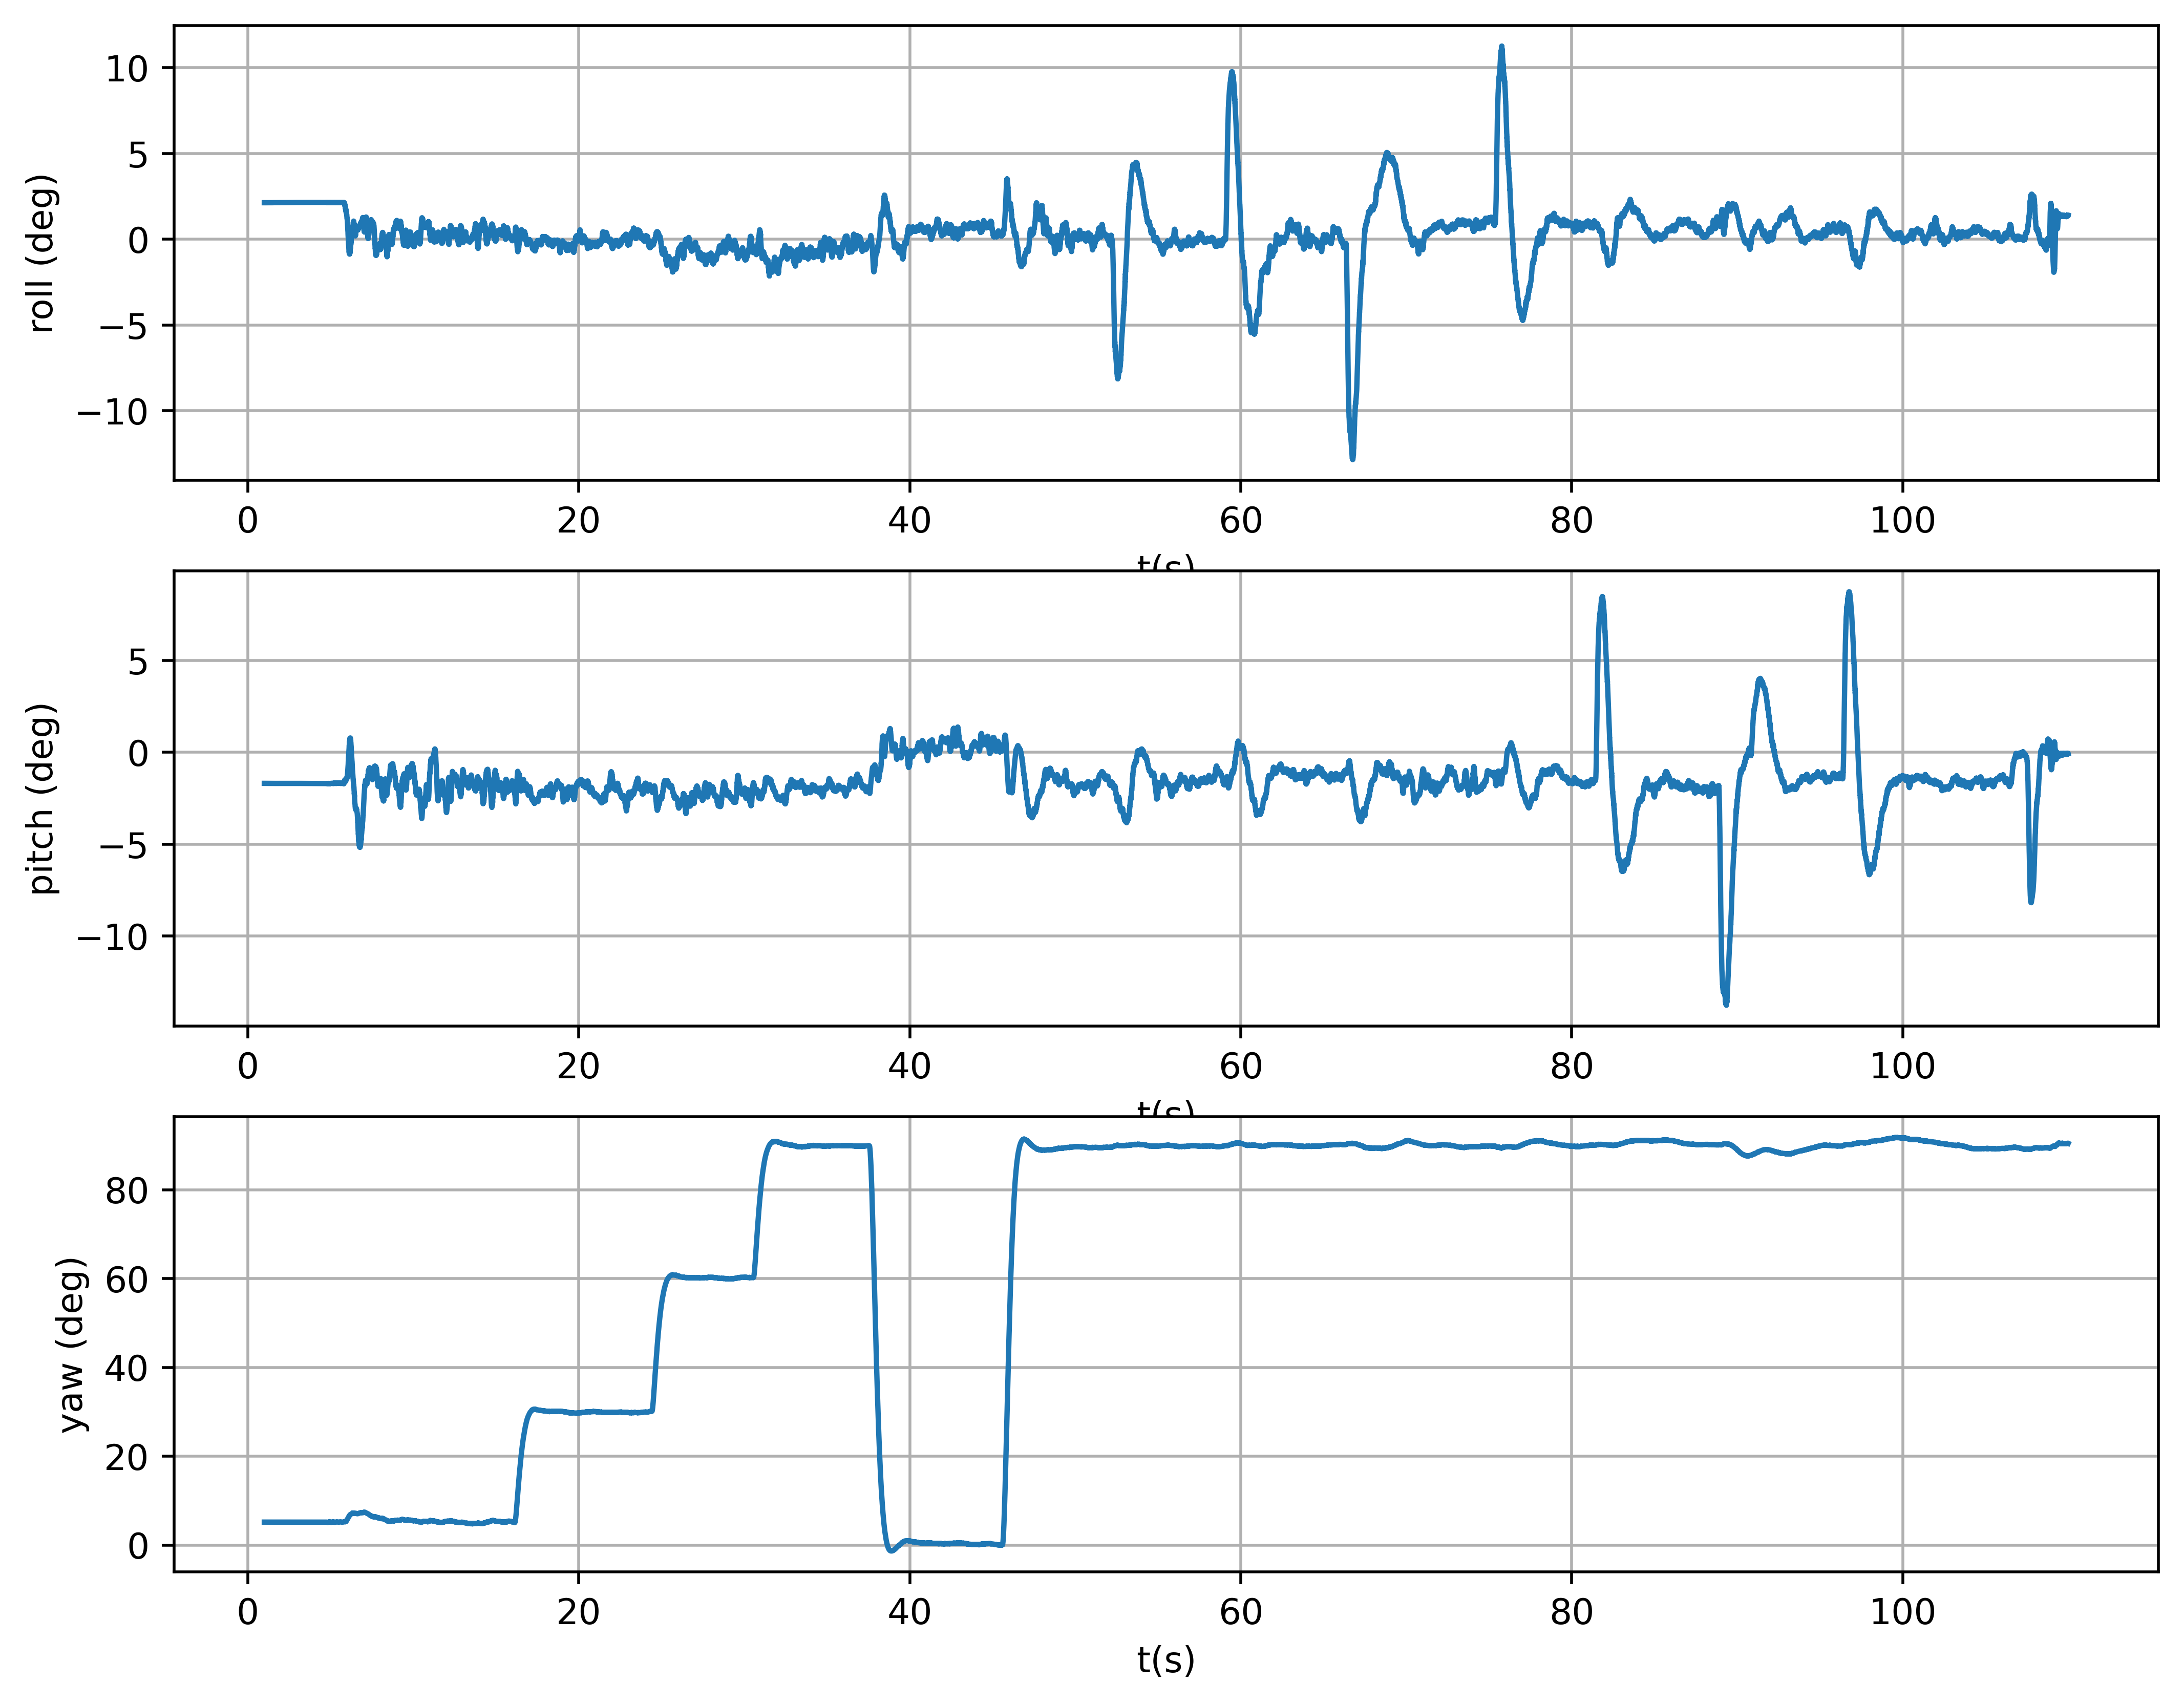

In [11]:
plt.figure(figsize=(10,8), dpi= 500)
plt.subplot(311)
plt.plot(loggings["imu"]["processed_time"], roll)
plt.ylabel('roll (deg)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(312)
plt.plot(loggings["imu"]["processed_time"], pitch)
plt.ylabel('pitch (deg)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(313)
plt.plot(loggings["imu"]["processed_time"], yaw)
plt.ylabel('yaw (deg)')
plt.xlabel('t(s)')
plt.grid(True)

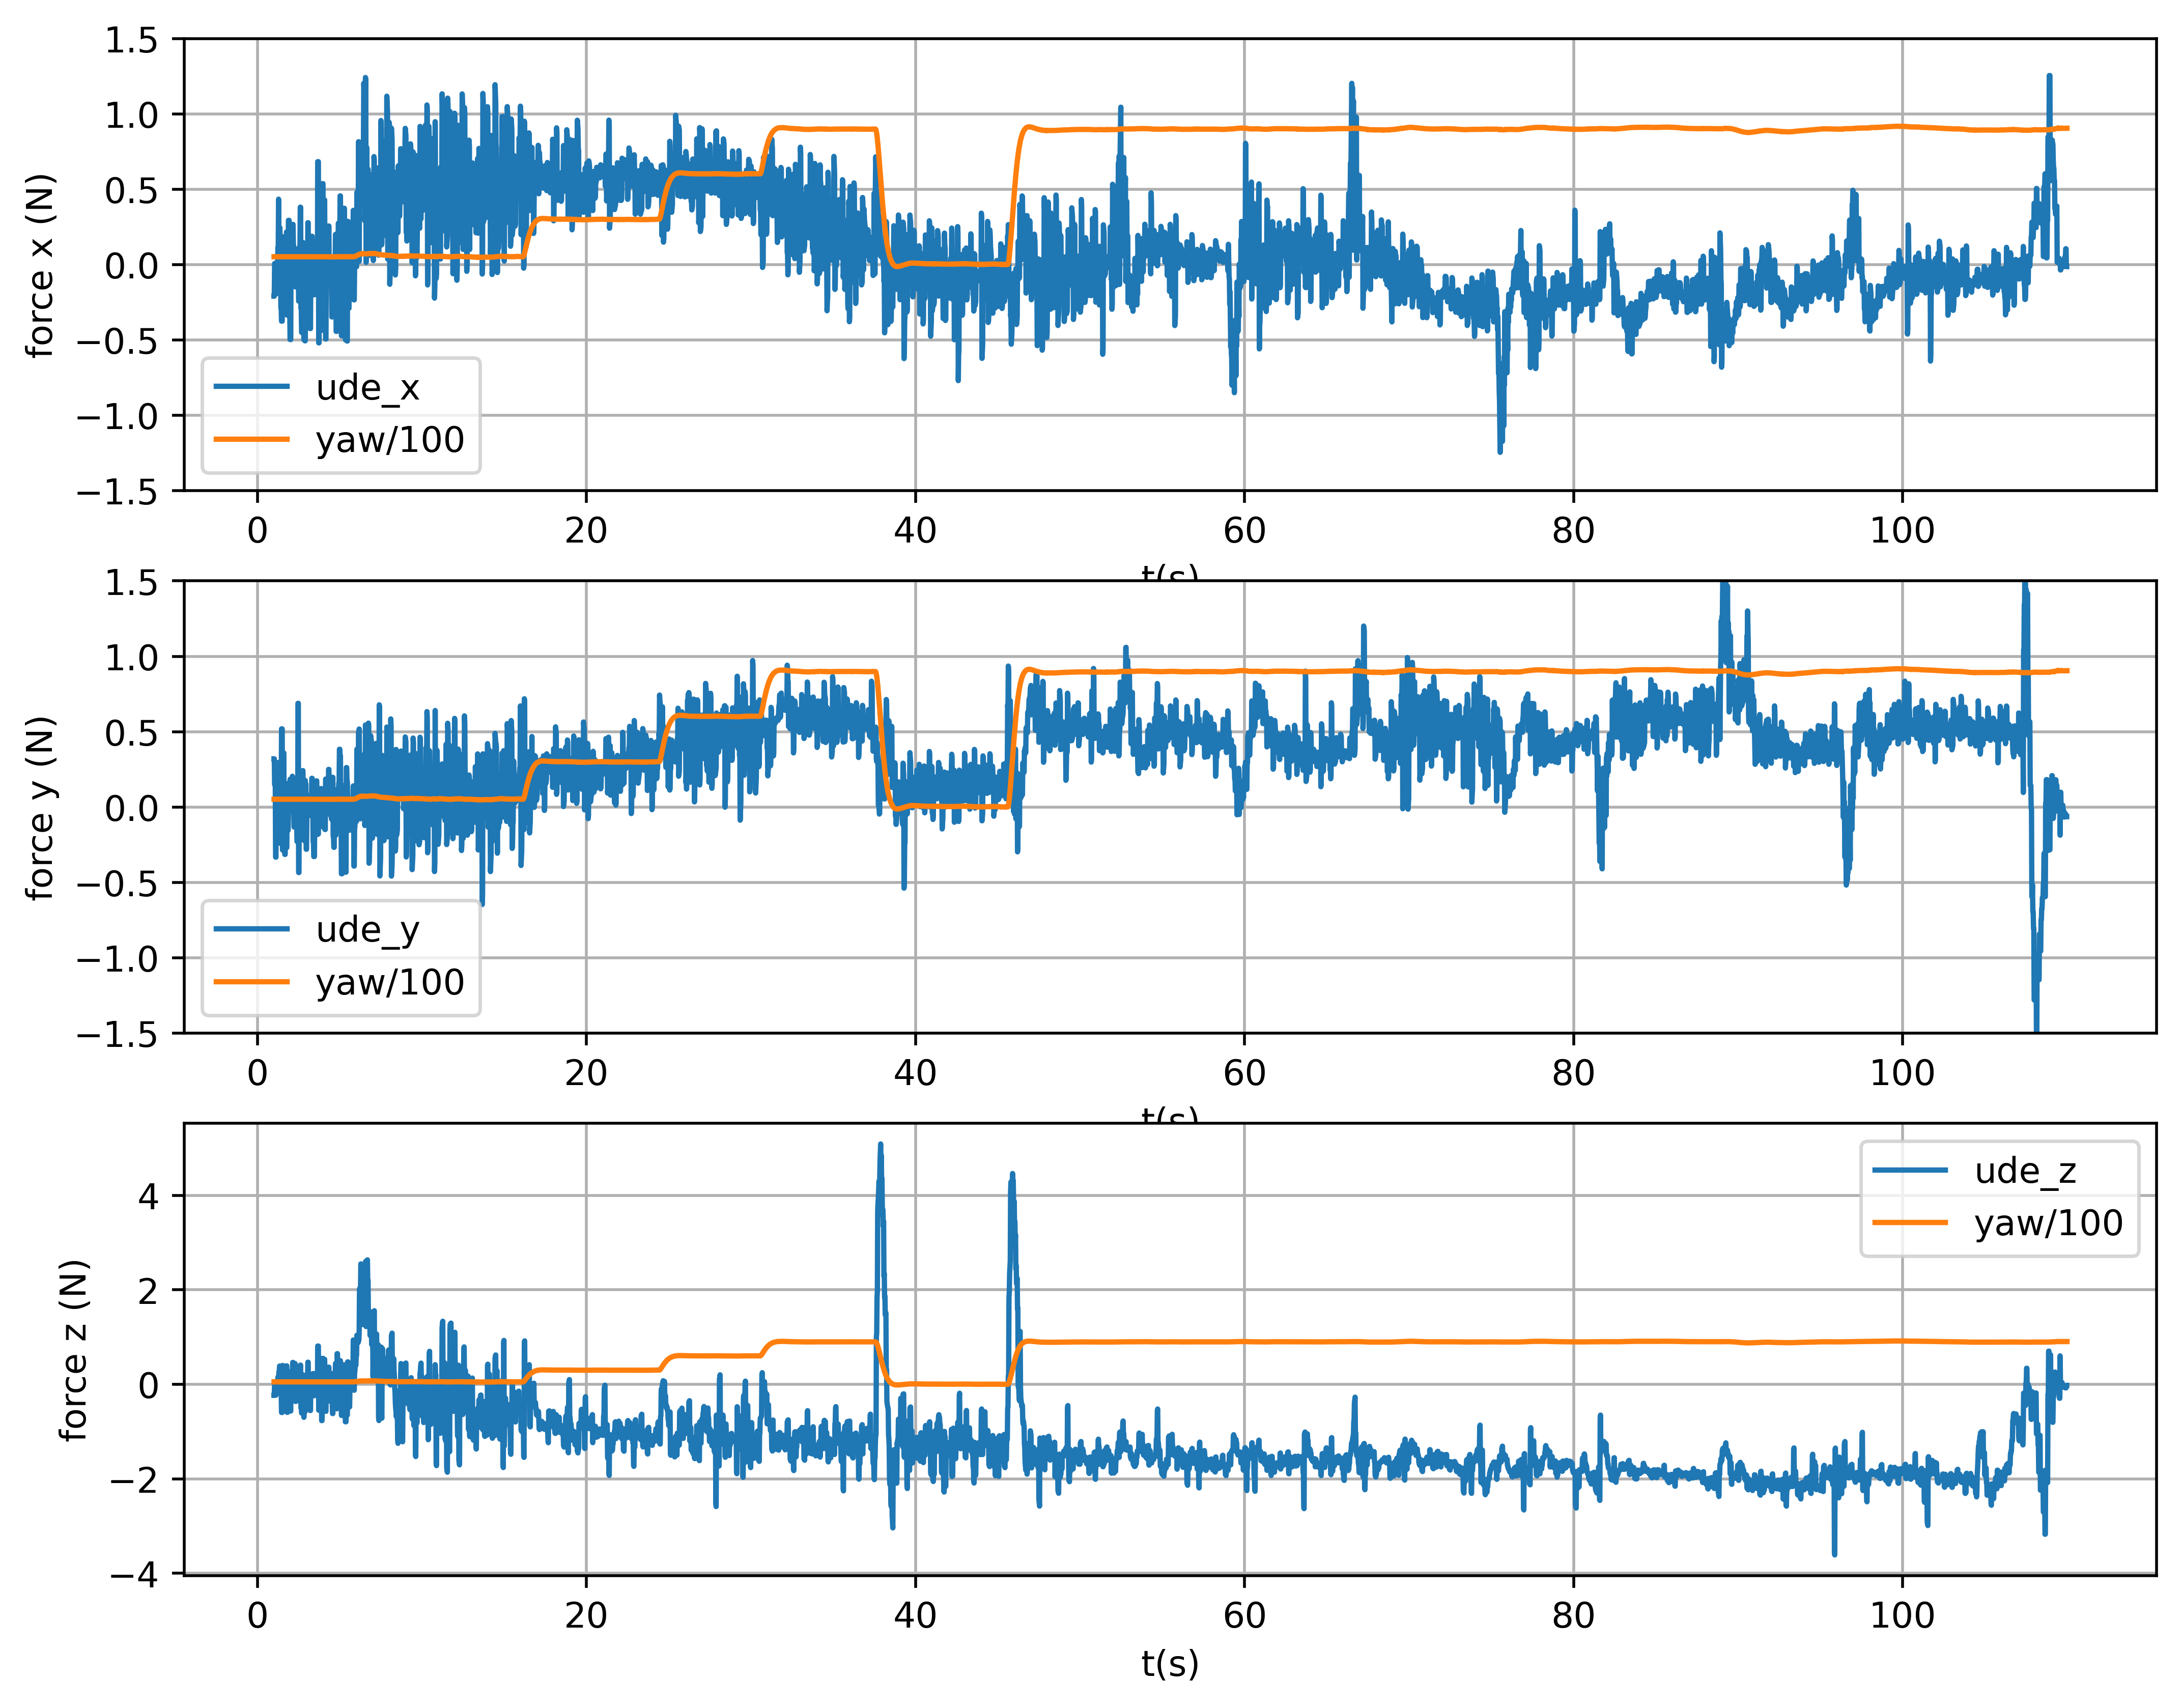

In [12]:
plt.figure(figsize=(10,8), dpi= 500)
plt.subplot(311)
plt.plot(loggings["output"]["processed_time"], loggings["output"]['ude_state.disturbance_estimate.x'])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)
plt.legend(['ude_x','yaw/100']) 
plt.ylabel('force x (N)')
plt.xlabel('t(s)')
plt.axis([None, None, -1.5, 1.5])

plt.grid(True)

plt.subplot(312)
plt.plot(loggings["output"]["processed_time"], loggings["output"]['ude_state.disturbance_estimate.y'])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)
plt.legend(['ude_y','yaw/100']) 
plt.ylabel('force y (N)')
plt.xlabel('t(s)')
plt.axis([None, None, -1.5, 1.5])
plt.grid(True)

plt.subplot(313)
plt.plot(loggings["output"]["processed_time"], loggings["output"]['ude_state.disturbance_estimate.z'])
plt.plot(loggings["imu"]["processed_time"], 0.01 * yaw)
plt.legend(['ude_z','yaw/100']) 
plt.ylabel('force z (N)')
plt.xlabel('t(s)')
plt.grid(True)


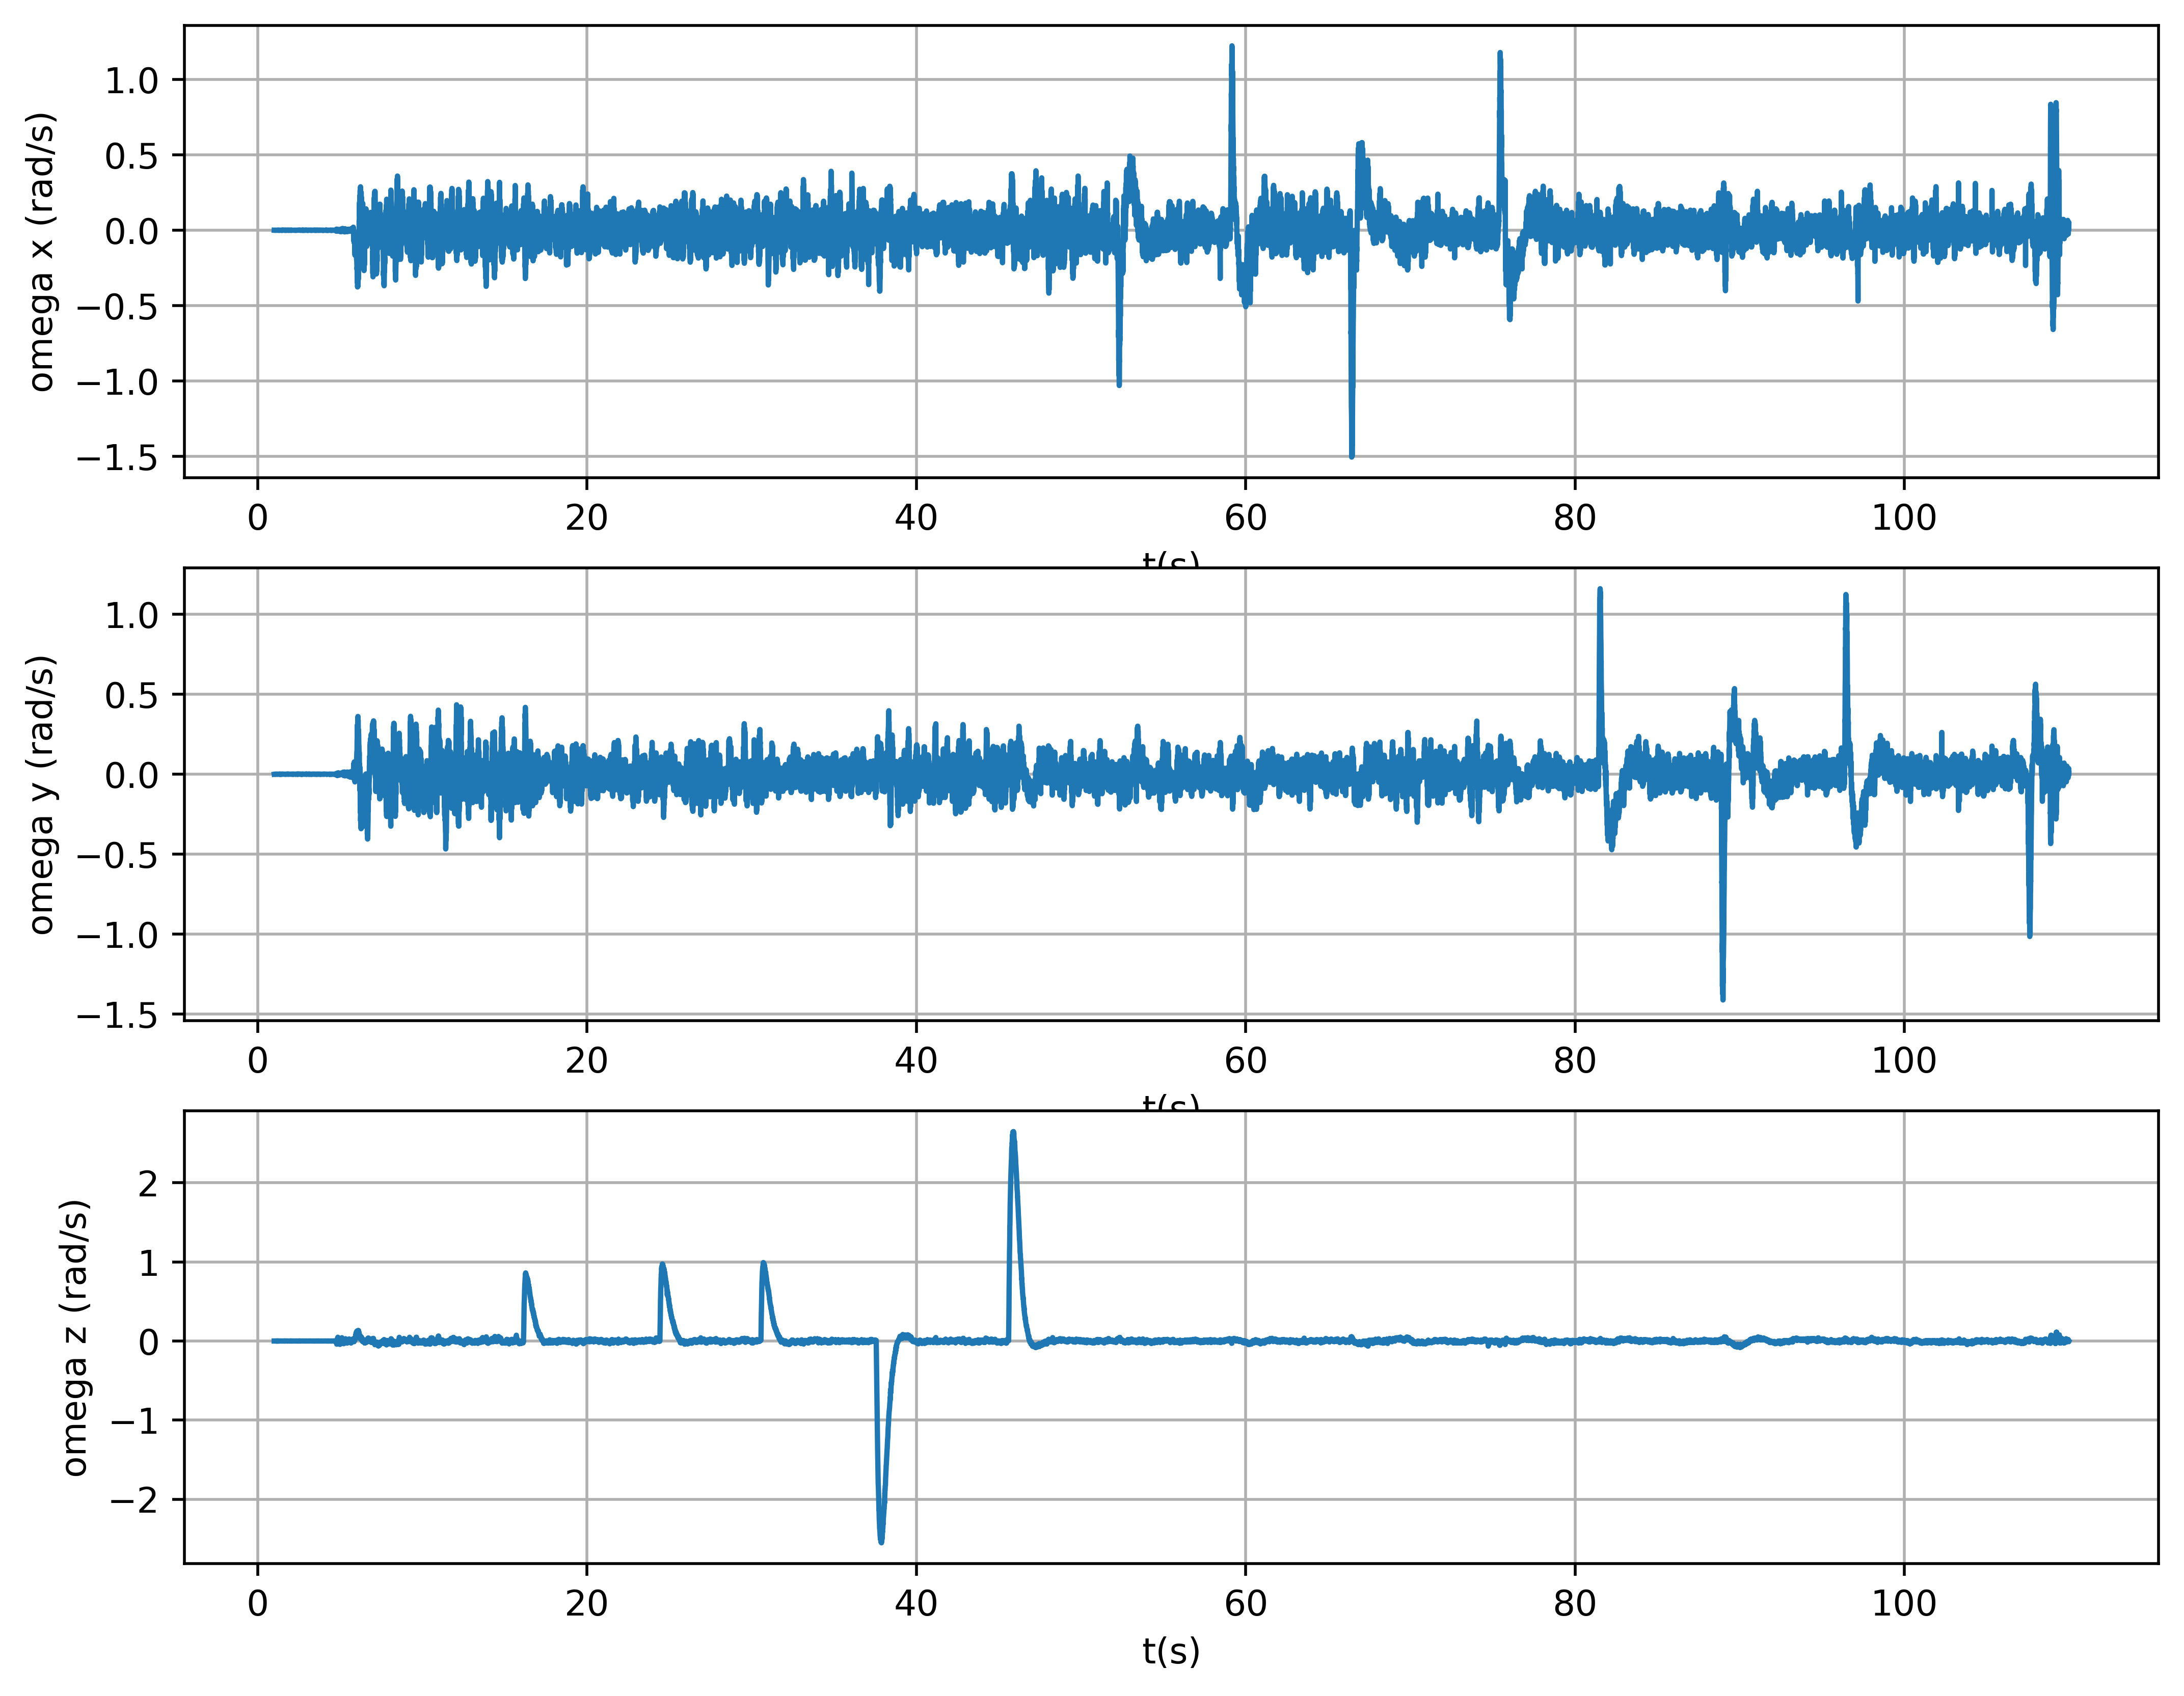

In [13]:
plt.figure(figsize=(10,8), dpi= 500)
startIdx = 0
endIdx = 7200
plt.subplot(311)
plt.plot(loggings["imu"]["processed_time"], loggings["imu"]["angular_velocity.x"])
plt.ylabel('omega x (rad/s)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(312)
plt.plot(loggings["imu"]["processed_time"], loggings["imu"]["angular_velocity.y"])
plt.ylabel('omega y (rad/s)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(313)
plt.plot(loggings["imu"]["processed_time"], loggings["imu"]["angular_velocity.z"])
plt.ylabel('omega z (rad/s)')
plt.xlabel('t(s)')
plt.grid(True)

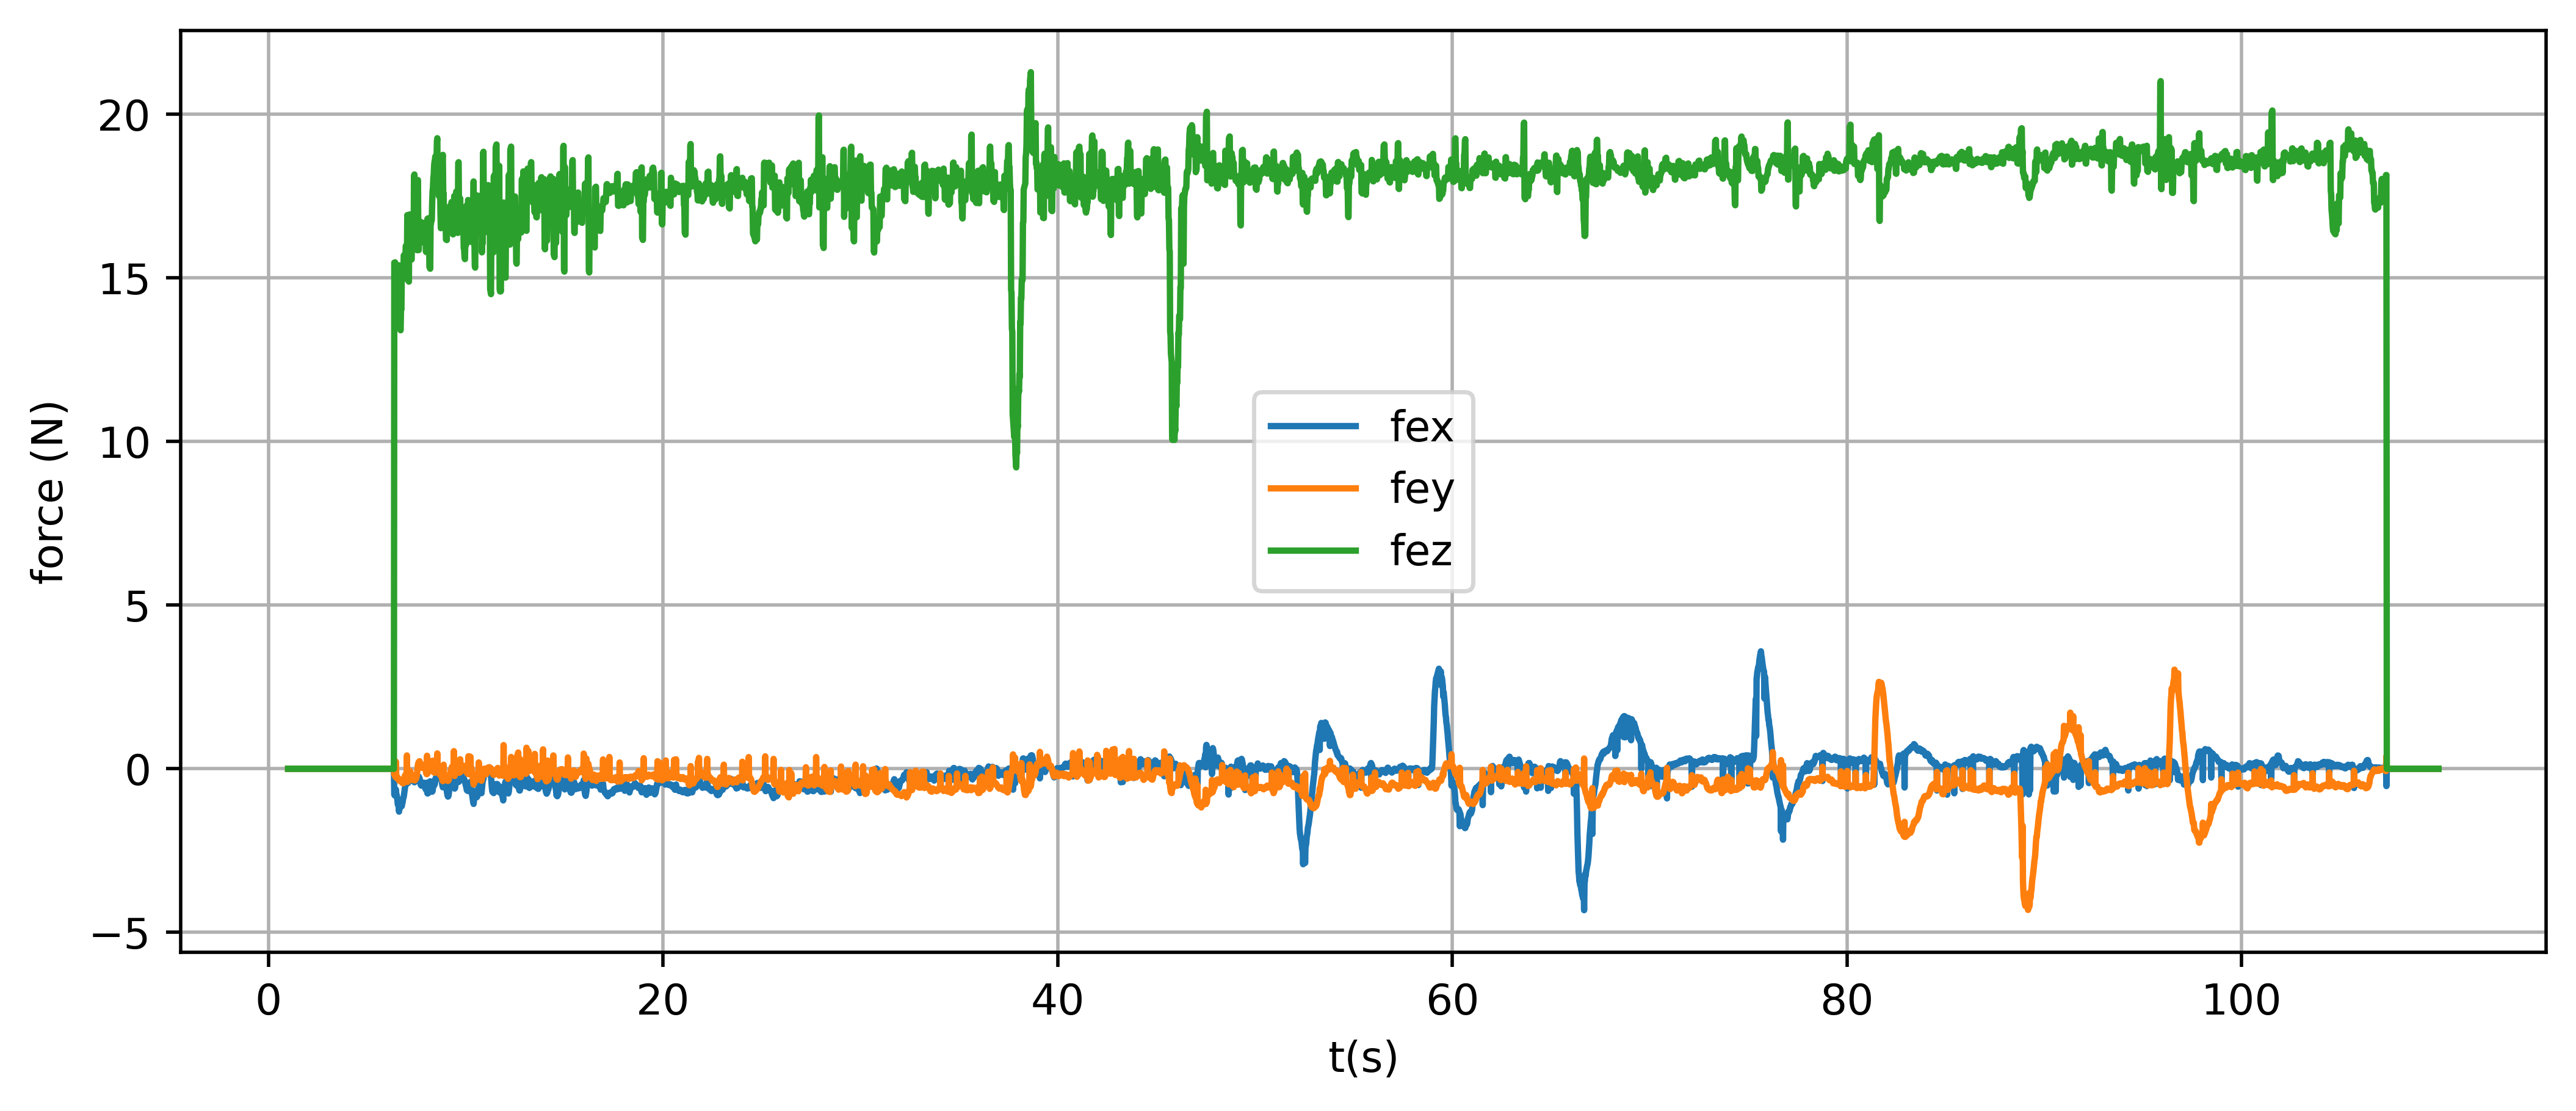

In [14]:
plt.figure(figsize=(10,4), dpi= 500)
plt.plot(loggings["output"]["processed_time"], loggings["output"]['ude_state.expected_thrust.x'])
plt.plot(loggings["output"]["processed_time"], loggings["output"]['ude_state.expected_thrust.y'])
plt.plot(loggings["output"]["processed_time"], loggings["output"]['ude_state.expected_thrust.z'])
plt.legend(['fex', 'fey', 'fez']) 
plt.ylabel('force (N)')
plt.xlabel('t(s)')
plt.grid(True)

(-4.448966479301453, 115.4290513753891, -0.1, 0.1)

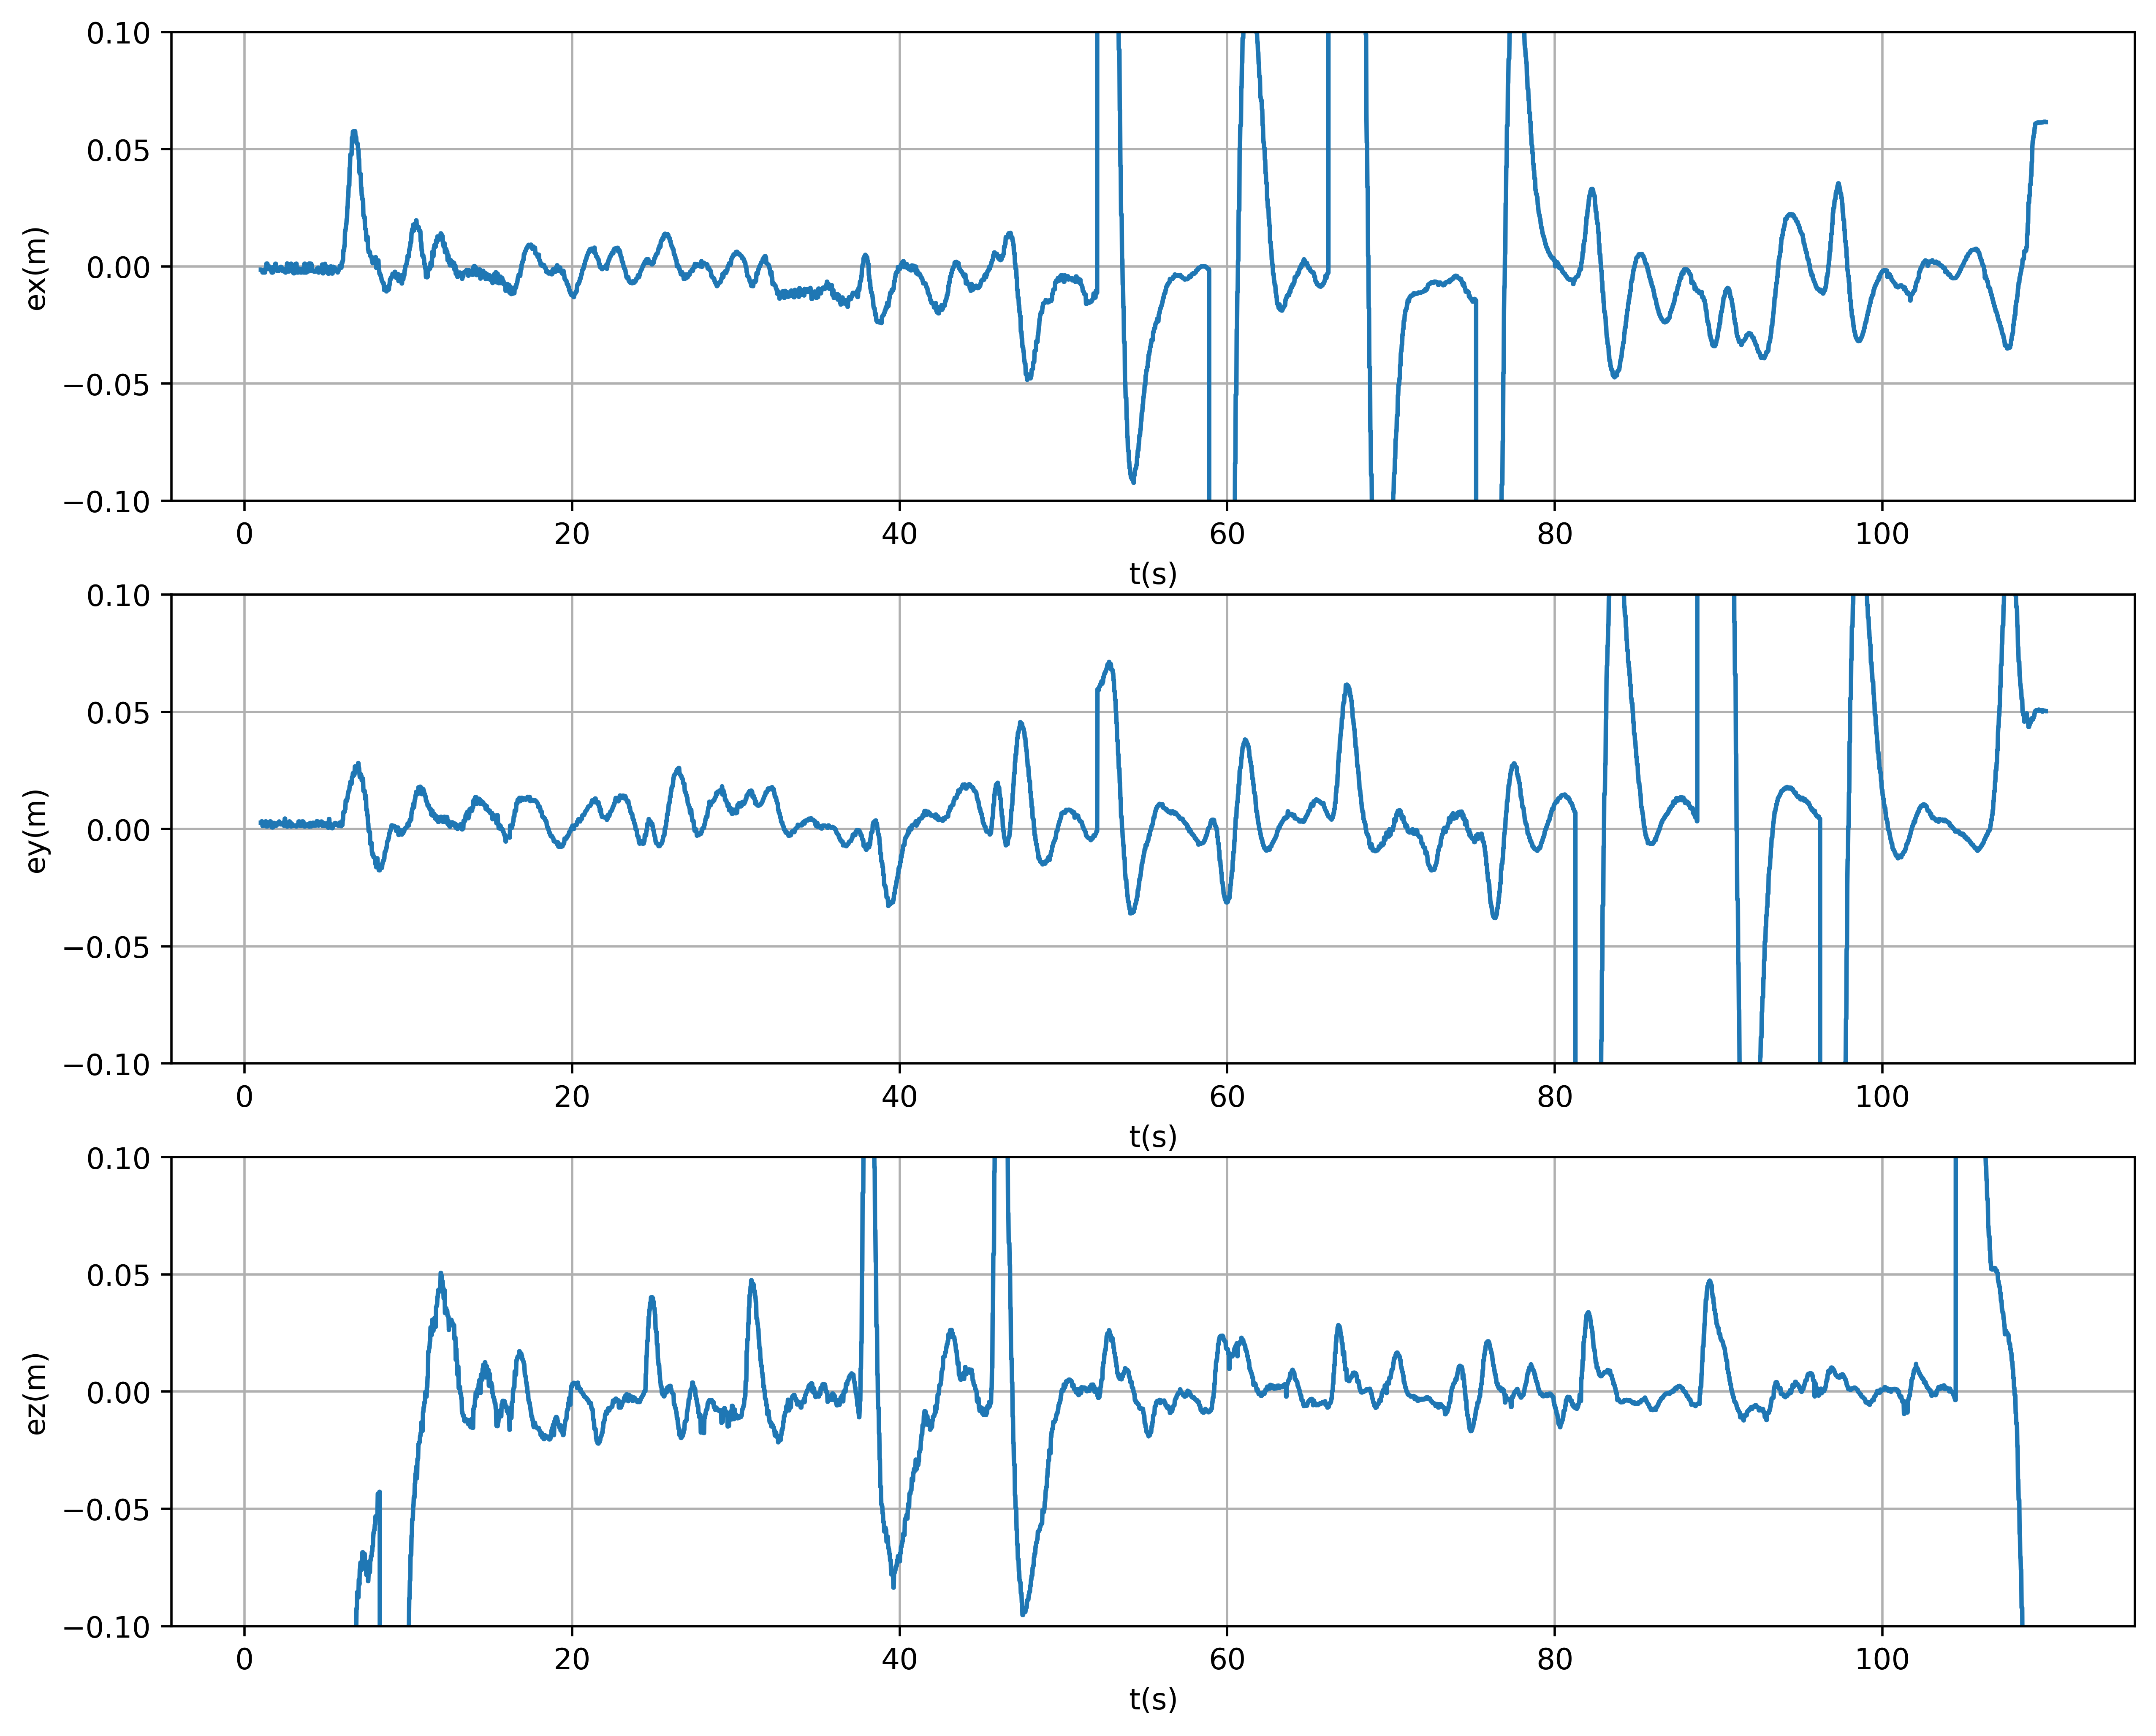

In [15]:
plt.figure(figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["output"]["processed_time"], loggings["output"]["position_error.x"])
plt.grid(True)
plt.ylabel('ex(m)')
plt.xlabel('t(s)')
plt.axis([None, None, -0.1, 0.1])
plt.subplot(312)
plt.plot(loggings["output"]["processed_time"], loggings["output"]["position_error.y"])
plt.grid(True)
plt.ylabel('ey(m)')
plt.xlabel('t(s)')
plt.axis([None, None, -0.1, 0.1])
plt.subplot(313)
plt.plot(loggings["output"]["processed_time"], loggings["output"]["position_error.z"])
plt.grid(True)
plt.ylabel('ez(m)')
plt.xlabel('t(s)')
plt.axis([None, None, -0.1, 0.1])

Text(0.5, 0, 't(s)')

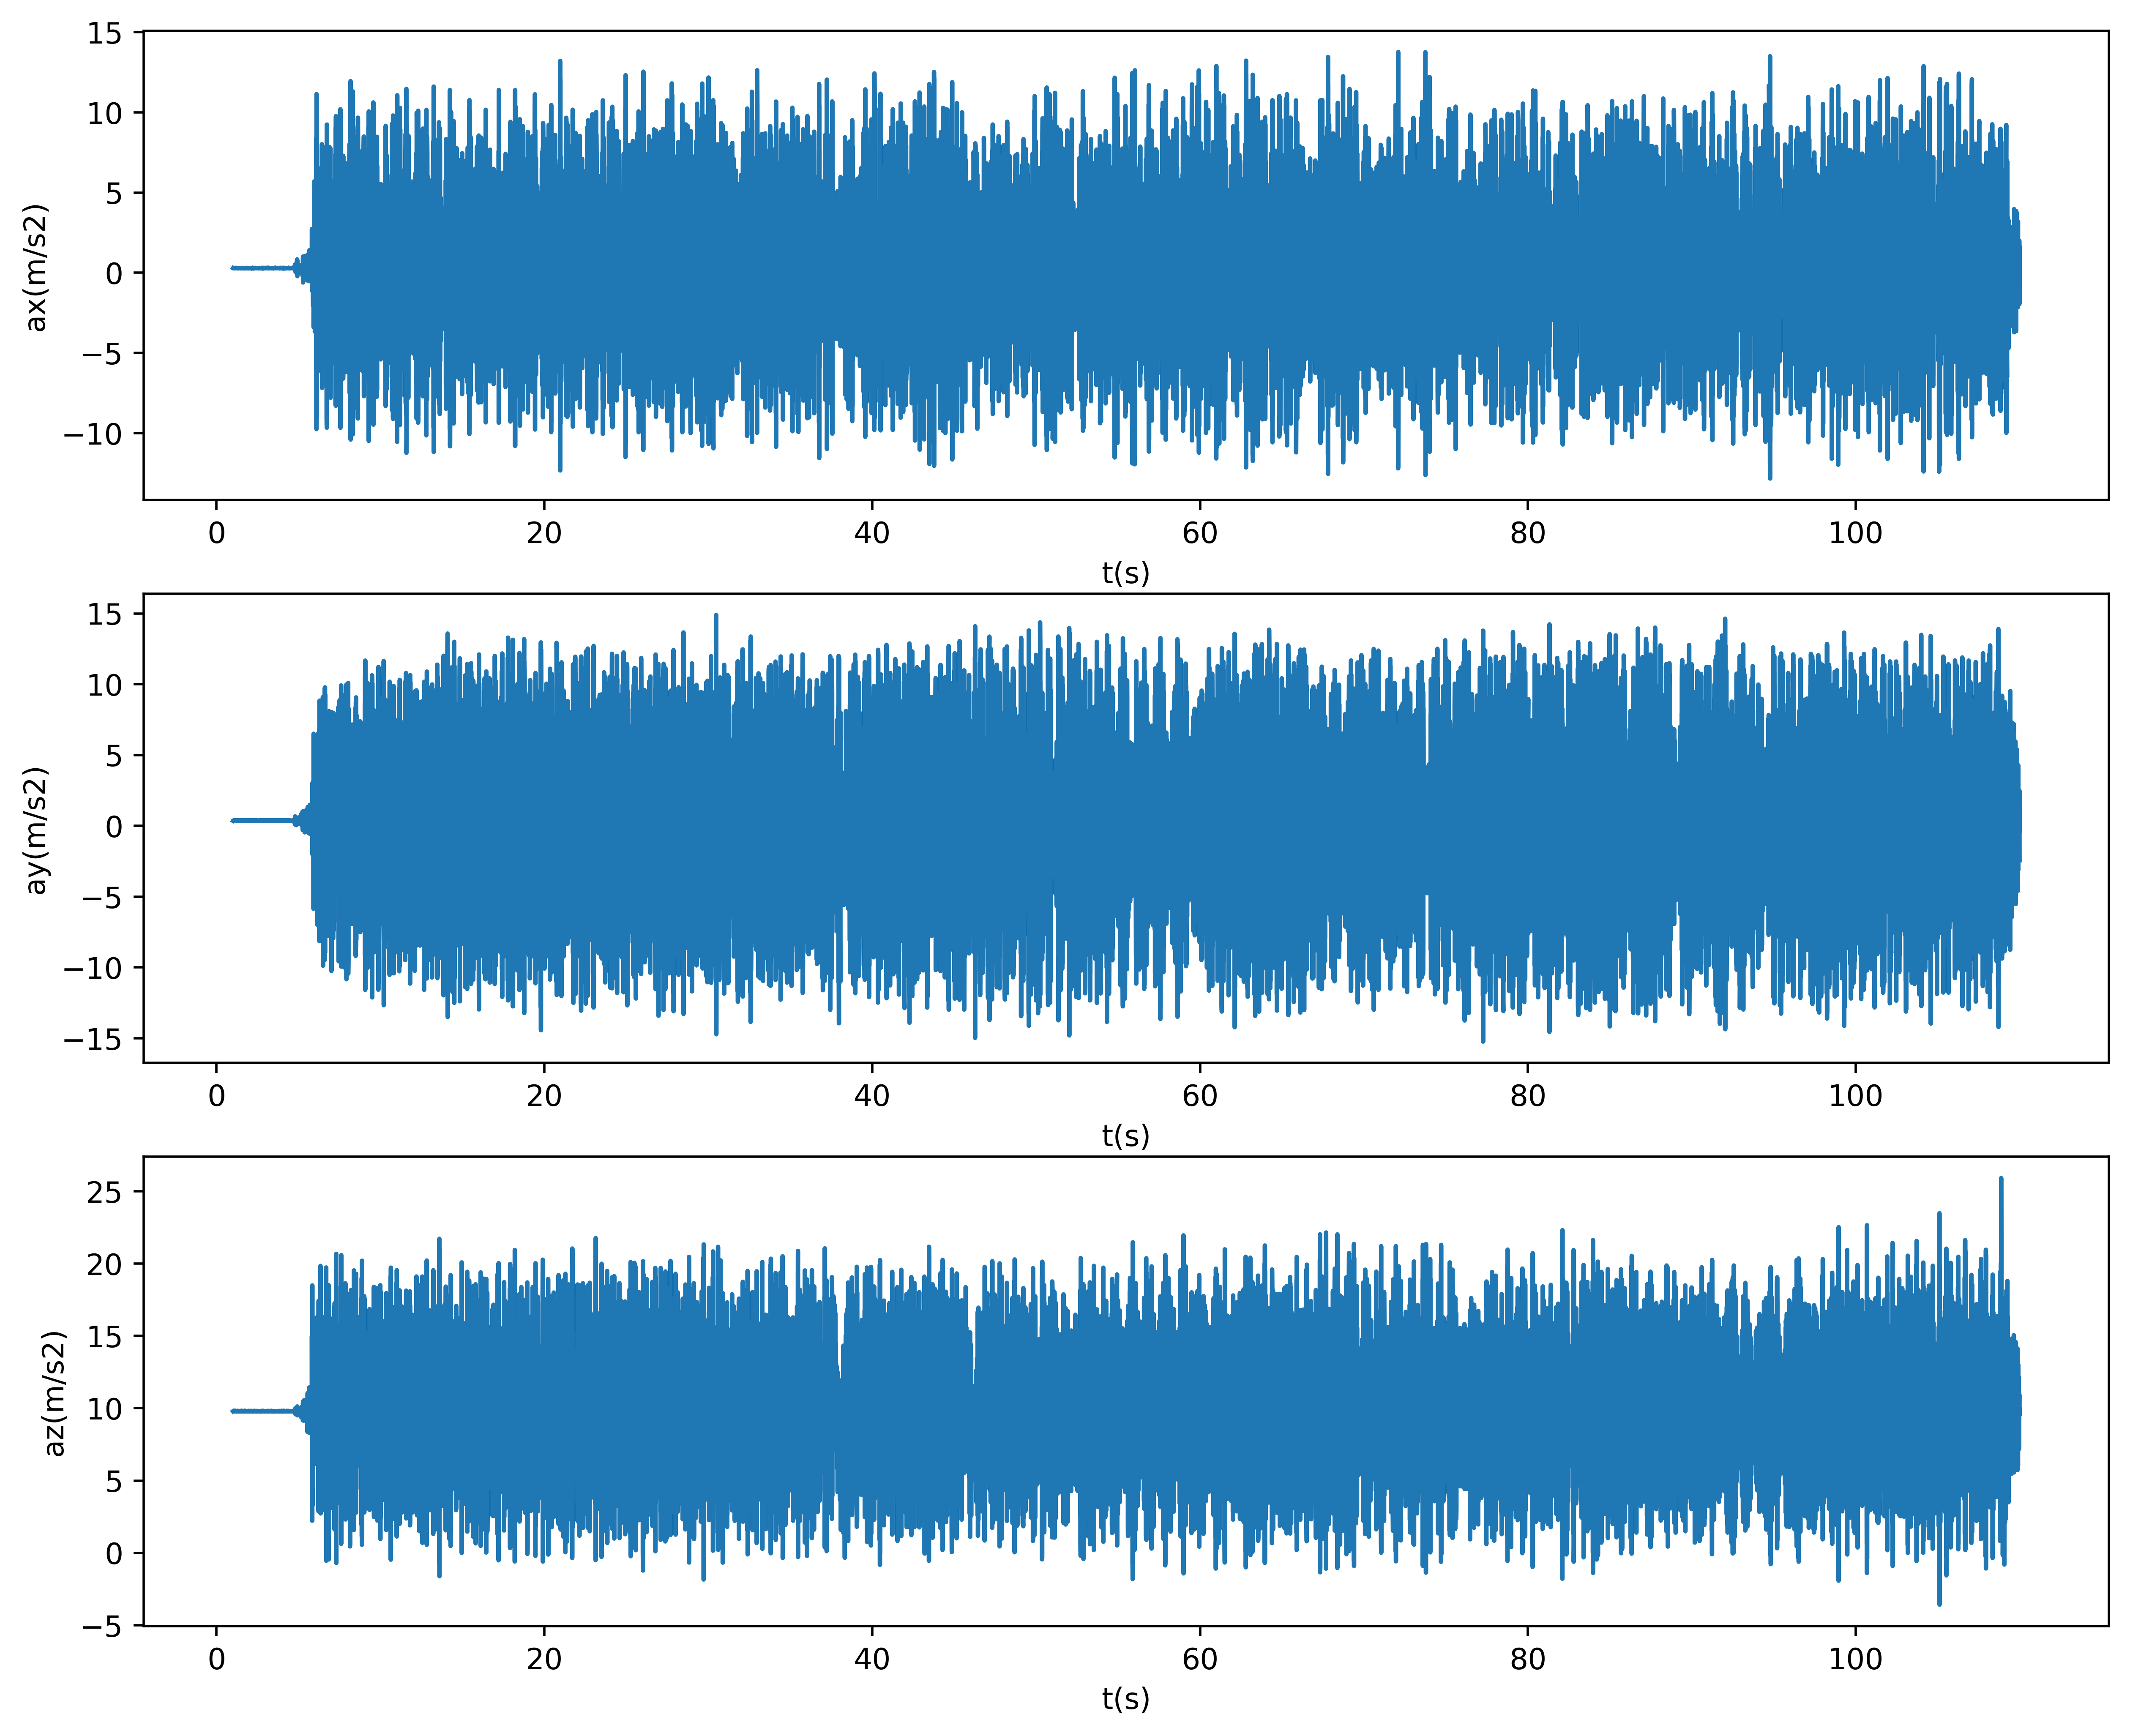

In [16]:
plt.figure(figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["imu"]["processed_time"], loggings["imu"]["linear_acceleration.x"])
plt.ylabel('ax(m/s2)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["imu"]["processed_time"], loggings["imu"]["linear_acceleration.y"])
plt.ylabel('ay(m/s2)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["imu"]["processed_time"], loggings["imu"]["linear_acceleration.z"])
plt.ylabel('az(m/s2)')
plt.xlabel('t(s)')


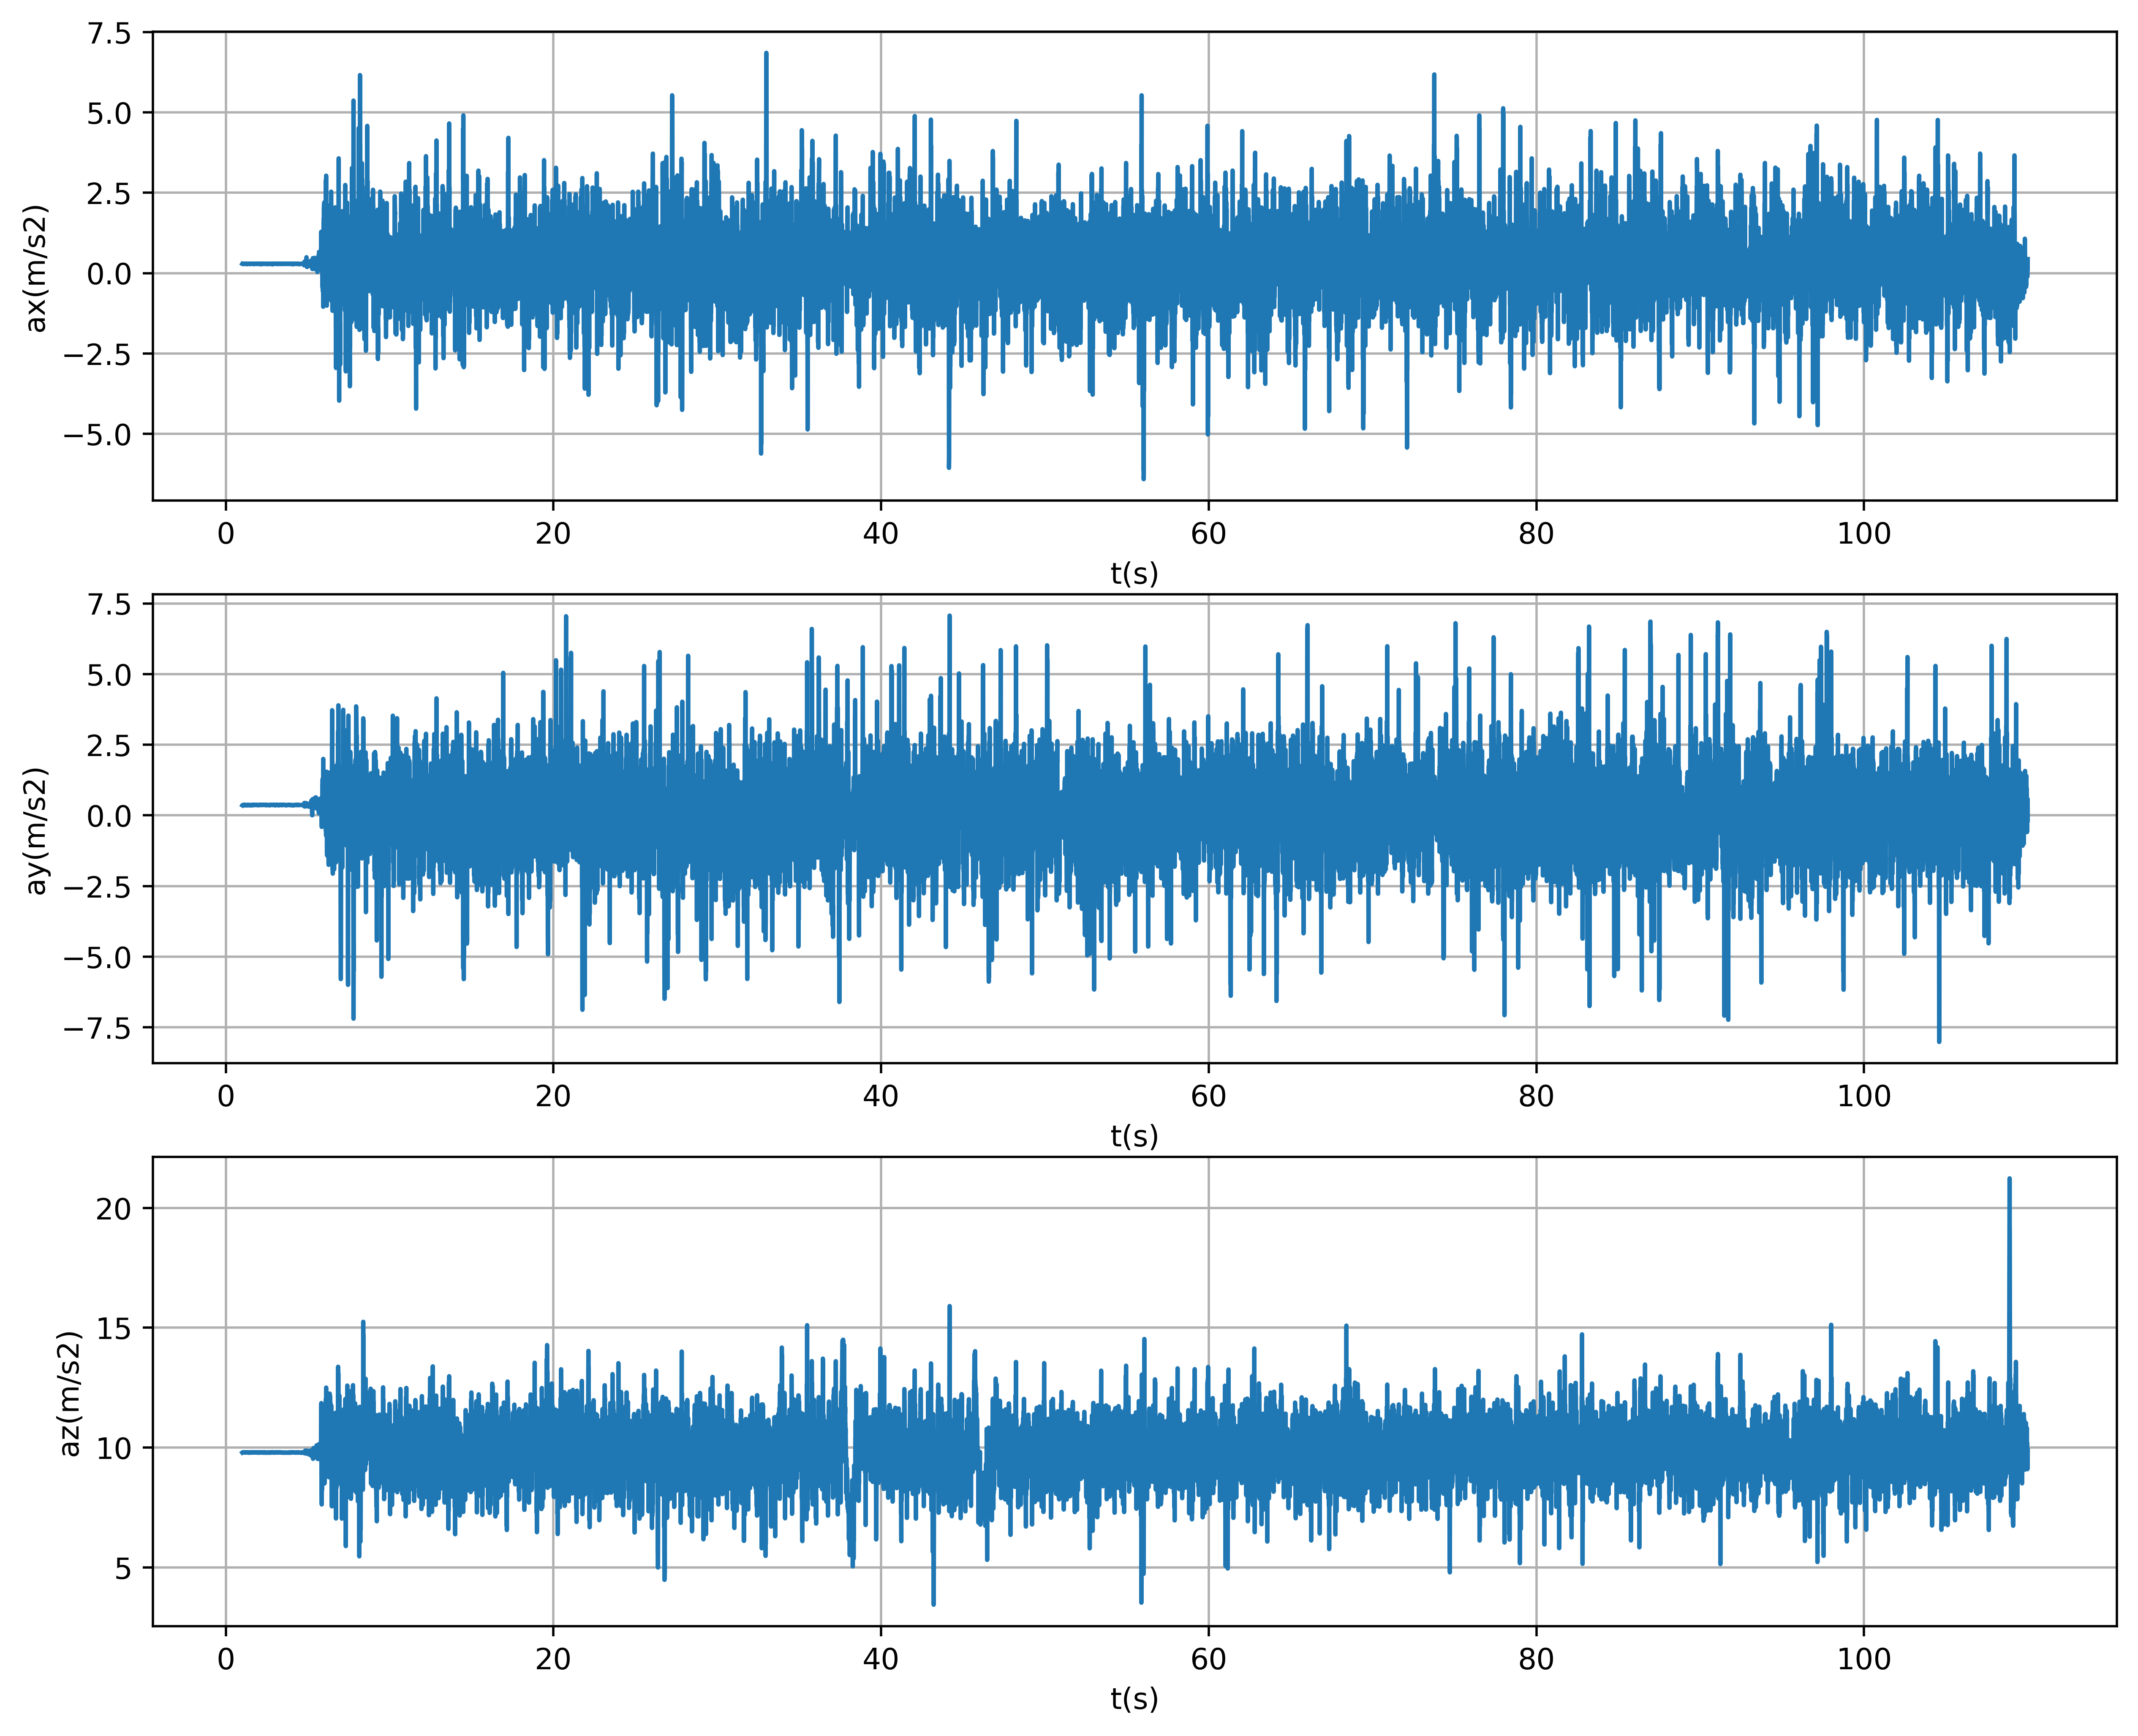

In [17]:
imu_filtered_x = ul.MovingWindowAverage(np.asarray( loggings["imu"]["linear_acceleration.x"]), 5)
imu_filtered_y = ul.MovingWindowAverage(np.asarray( loggings["imu"]["linear_acceleration.y"]), 5)
imu_filtered_z = ul.MovingWindowAverage(np.asarray( loggings["imu"]["linear_acceleration.z"]), 5)
plt.figure(figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["imu"]["processed_time"], imu_filtered_x)
plt.ylabel('ax(m/s2)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(312)
plt.plot(loggings["imu"]["processed_time"], imu_filtered_y)
plt.ylabel('ay(m/s2)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(313)
plt.plot(loggings["imu"]["processed_time"], imu_filtered_z)
plt.ylabel('az(m/s2)')
plt.xlabel('t(s)')
plt.grid(True)